In [1]:
### Prepare module structure ###

import sys
sys.path.append("../")

In [2]:
### IMPORT ###

import numpy as np
import math
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

import time

import matplotlib.pyplot as plt
%matplotlib inline

from util import *
import data
import models

# auto reload imports on local changes
%load_ext autoreload
%autoreload 2
print(torch.__version__)

1.0.0


In [3]:
### Check device ###

USE_GPU = True

dtype = torch.float32

if USE_GPU and torch.cuda.is_available():
    # TODO: Change to CPU used!
    device = torch.device('cuda:1')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda:1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


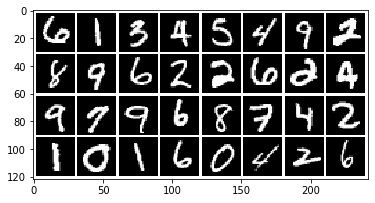

torch.Size([32, 1, 28, 28])


In [4]:
### LOAD DATA ###

dataset = 'mnist'
dataloader, imsize = data.load(dataset, path='/home/shared/phase-retrieval/data/' + dataset, batch_size=32)

sample = next(iter(dataloader['train']))
sample_ft =  torch.rfft(sample, 2, onesided=False)
sample_magnitudes = torch.sqrt(torch.sum(sample_ft ** 2, -1))

plot_grid(sample)
print(sample_magnitudes.shape)

In [12]:
def calc_mags(x):
    ft =  torch.rfft(x, 2, onesided=False)
    mags = torch.sqrt(torch.sum(ft ** 2, -1) + 1e-16)
    return mags

In [6]:
# Define loss

def gen_loss(gen_output, x):
    return  torch.mean((gen_output - x) ** 2)
    #return  torch.mean(torch.abs(gen_output - x))

In [7]:
### Create new models ###

gen = models.FCNet(imsize=imsize, h=2048)

Version 0.4


In [8]:
# Set training parameters

history = []
opt = optim.Adam(gen.parameters(), lr=1e-3)

In [9]:
# Initial loss

gen = gen.to(device)
sample = sample.to(device)
sample_magnitudes = sample_magnitudes.to(device)

gen_out = gen(sample_magnitudes)

loss = gen_loss(gen_out, sample)

print("Generator loss:", loss.item())

Generator loss: 0.23353475332260132


In [10]:
def train_model(model, optimizer, device, loader_train, epochs=1):

    # move the model parameters to CPU/GPU
    model = model.to(device=device)
    
    history = []
    
    for e in range(epochs):

        for t, x in enumerate(loader_train):
            # put model to training mode
            model.train()
            
            # move x to device and reduce to magnitude information in fourier space
            x = x.to(device=device)
            magnitudes = calc_mags(x)

            # compute loss as pixel wise distance to original input
            x_pred = gen(magnitudes)
            
            loss = gen_loss(x_pred, x)
            #loss = torch.mean((x - out_real)**2) + torch.mean((phases - out_phases)**2)
            history.append(loss.item())

            # perform backprop and learning step
            optimizer.zero_grad()
            loss.backward() 
            optimizer.step()

            if t % 100 == 0:
                print("epoch: {:2} \t step:{} \t loss: {:3.4}".format(e+1, t, history[-1]))
                
        plt.plot(history)
        plt.show()
                
    return history

epoch:  1 	 step:0 	 loss: 0.2341
epoch:  1 	 step:100 	 loss: 0.04437
epoch:  1 	 step:200 	 loss: 0.0447
epoch:  1 	 step:300 	 loss: 0.04444
epoch:  1 	 step:400 	 loss: 0.04496
epoch:  1 	 step:500 	 loss: 0.03417
epoch:  1 	 step:600 	 loss: 0.02973
epoch:  1 	 step:700 	 loss: 0.02718
epoch:  1 	 step:800 	 loss: 0.03125
epoch:  1 	 step:900 	 loss: 0.03319
epoch:  1 	 step:1000 	 loss: 0.0267
epoch:  1 	 step:1100 	 loss: 0.03406
epoch:  1 	 step:1200 	 loss: 0.03034
epoch:  1 	 step:1300 	 loss: 0.02813
epoch:  1 	 step:1400 	 loss: 0.03527
epoch:  1 	 step:1500 	 loss: 0.0349
epoch:  1 	 step:1600 	 loss: 0.0265
epoch:  1 	 step:1700 	 loss: 0.03038
epoch:  1 	 step:1800 	 loss: 0.03055


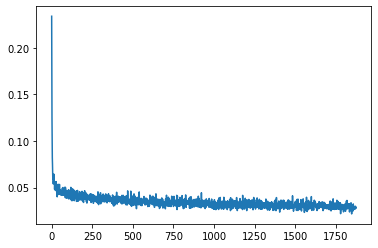

epoch:  2 	 step:0 	 loss: 0.03239
epoch:  2 	 step:100 	 loss: 0.02735
epoch:  2 	 step:200 	 loss: 0.03087
epoch:  2 	 step:300 	 loss: 0.02766
epoch:  2 	 step:400 	 loss: 0.02766
epoch:  2 	 step:500 	 loss: 0.02576
epoch:  2 	 step:600 	 loss: 0.02784
epoch:  2 	 step:700 	 loss: 0.02743
epoch:  2 	 step:800 	 loss: 0.03065
epoch:  2 	 step:900 	 loss: 0.02918
epoch:  2 	 step:1000 	 loss: 0.02527
epoch:  2 	 step:1100 	 loss: 0.02699
epoch:  2 	 step:1200 	 loss: 0.03028
epoch:  2 	 step:1300 	 loss: 0.02321
epoch:  2 	 step:1400 	 loss: 0.03101
epoch:  2 	 step:1500 	 loss: 0.02931
epoch:  2 	 step:1600 	 loss: 0.0239
epoch:  2 	 step:1700 	 loss: 0.02566
epoch:  2 	 step:1800 	 loss: 0.02938


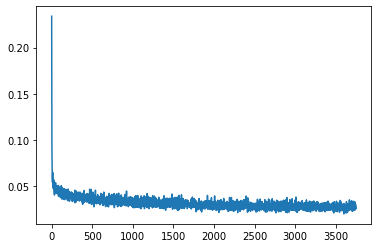

epoch:  3 	 step:0 	 loss: 0.02635
epoch:  3 	 step:100 	 loss: 0.02372
epoch:  3 	 step:200 	 loss: 0.02296
epoch:  3 	 step:300 	 loss: 0.02352
epoch:  3 	 step:400 	 loss: 0.01938
epoch:  3 	 step:500 	 loss: 0.02436
epoch:  3 	 step:600 	 loss: 0.02759
epoch:  3 	 step:700 	 loss: 0.03172
epoch:  3 	 step:800 	 loss: 0.02441
epoch:  3 	 step:900 	 loss: 0.02881
epoch:  3 	 step:1000 	 loss: 0.02907
epoch:  3 	 step:1100 	 loss: 0.02436
epoch:  3 	 step:1200 	 loss: 0.0245
epoch:  3 	 step:1300 	 loss: 0.0244
epoch:  3 	 step:1400 	 loss: 0.02598
epoch:  3 	 step:1500 	 loss: 0.02277
epoch:  3 	 step:1600 	 loss: 0.02673
epoch:  3 	 step:1700 	 loss: 0.02321
epoch:  3 	 step:1800 	 loss: 0.02466


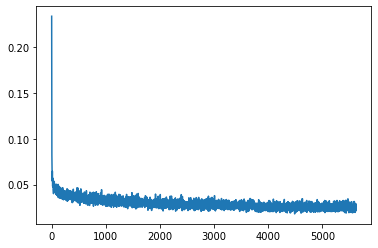

epoch:  4 	 step:0 	 loss: 0.02206
epoch:  4 	 step:100 	 loss: 0.02797
epoch:  4 	 step:200 	 loss: 0.02822
epoch:  4 	 step:300 	 loss: 0.02187
epoch:  4 	 step:400 	 loss: 0.02045
epoch:  4 	 step:500 	 loss: 0.02244
epoch:  4 	 step:600 	 loss: 0.02302
epoch:  4 	 step:700 	 loss: 0.02397
epoch:  4 	 step:800 	 loss: 0.02478
epoch:  4 	 step:900 	 loss: 0.02148
epoch:  4 	 step:1000 	 loss: 0.02495
epoch:  4 	 step:1100 	 loss: 0.02157
epoch:  4 	 step:1200 	 loss: 0.02576
epoch:  4 	 step:1300 	 loss: 0.02474
epoch:  4 	 step:1400 	 loss: 0.02014
epoch:  4 	 step:1500 	 loss: 0.02238
epoch:  4 	 step:1600 	 loss: 0.02411
epoch:  4 	 step:1700 	 loss: 0.02502
epoch:  4 	 step:1800 	 loss: 0.02335


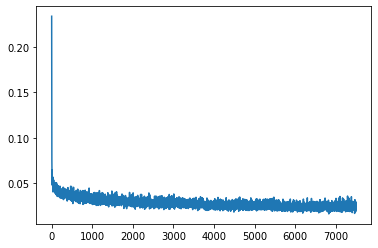

epoch:  5 	 step:0 	 loss: 0.01954
epoch:  5 	 step:100 	 loss: 0.0183
epoch:  5 	 step:200 	 loss: 0.02179
epoch:  5 	 step:300 	 loss: 0.01942
epoch:  5 	 step:400 	 loss: 0.02895
epoch:  5 	 step:500 	 loss: 0.02546
epoch:  5 	 step:600 	 loss: 0.0212
epoch:  5 	 step:700 	 loss: 0.02045
epoch:  5 	 step:800 	 loss: 0.02353
epoch:  5 	 step:900 	 loss: 0.01946
epoch:  5 	 step:1000 	 loss: 0.02246
epoch:  5 	 step:1100 	 loss: 0.02076
epoch:  5 	 step:1200 	 loss: 0.02437
epoch:  5 	 step:1300 	 loss: 0.0232
epoch:  5 	 step:1400 	 loss: 0.0222
epoch:  5 	 step:1500 	 loss: 0.0212
epoch:  5 	 step:1600 	 loss: 0.02218
epoch:  5 	 step:1700 	 loss: 0.02533
epoch:  5 	 step:1800 	 loss: 0.02322


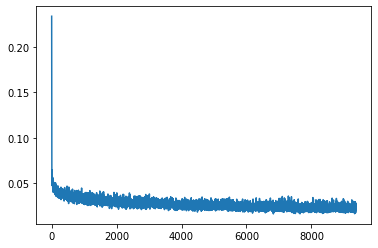

epoch:  6 	 step:0 	 loss: 0.02188
epoch:  6 	 step:100 	 loss: 0.0235
epoch:  6 	 step:200 	 loss: 0.02051
epoch:  6 	 step:300 	 loss: 0.02503
epoch:  6 	 step:400 	 loss: 0.02267
epoch:  6 	 step:500 	 loss: 0.01924
epoch:  6 	 step:600 	 loss: 0.02189
epoch:  6 	 step:700 	 loss: 0.01812
epoch:  6 	 step:800 	 loss: 0.02011
epoch:  6 	 step:900 	 loss: 0.02149
epoch:  6 	 step:1000 	 loss: 0.0232
epoch:  6 	 step:1100 	 loss: 0.02008
epoch:  6 	 step:1200 	 loss: 0.0192
epoch:  6 	 step:1300 	 loss: 0.02203
epoch:  6 	 step:1400 	 loss: 0.02183
epoch:  6 	 step:1500 	 loss: 0.01942
epoch:  6 	 step:1600 	 loss: 0.0182
epoch:  6 	 step:1700 	 loss: 0.01941
epoch:  6 	 step:1800 	 loss: 0.01744


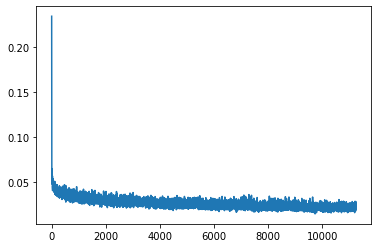

epoch:  7 	 step:0 	 loss: 0.0198
epoch:  7 	 step:100 	 loss: 0.0215
epoch:  7 	 step:200 	 loss: 0.02012
epoch:  7 	 step:300 	 loss: 0.02002
epoch:  7 	 step:400 	 loss: 0.01948
epoch:  7 	 step:500 	 loss: 0.02129
epoch:  7 	 step:600 	 loss: 0.01734
epoch:  7 	 step:700 	 loss: 0.01704
epoch:  7 	 step:800 	 loss: 0.01821
epoch:  7 	 step:900 	 loss: 0.02544
epoch:  7 	 step:1000 	 loss: 0.02076
epoch:  7 	 step:1100 	 loss: 0.01649
epoch:  7 	 step:1200 	 loss: 0.01984
epoch:  7 	 step:1300 	 loss: 0.0172
epoch:  7 	 step:1400 	 loss: 0.02121
epoch:  7 	 step:1500 	 loss: 0.01889
epoch:  7 	 step:1600 	 loss: 0.02069
epoch:  7 	 step:1700 	 loss: 0.02242
epoch:  7 	 step:1800 	 loss: 0.02035


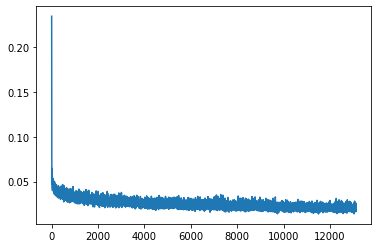

epoch:  8 	 step:0 	 loss: 0.02222
epoch:  8 	 step:100 	 loss: 0.01733
epoch:  8 	 step:200 	 loss: 0.01766
epoch:  8 	 step:300 	 loss: 0.02301
epoch:  8 	 step:400 	 loss: 0.02073
epoch:  8 	 step:500 	 loss: 0.02154
epoch:  8 	 step:600 	 loss: 0.01673
epoch:  8 	 step:700 	 loss: 0.01872
epoch:  8 	 step:800 	 loss: 0.02301
epoch:  8 	 step:900 	 loss: 0.01645
epoch:  8 	 step:1000 	 loss: 0.01789
epoch:  8 	 step:1100 	 loss: 0.02015
epoch:  8 	 step:1200 	 loss: 0.01676
epoch:  8 	 step:1300 	 loss: 0.01865
epoch:  8 	 step:1400 	 loss: 0.02018
epoch:  8 	 step:1500 	 loss: 0.02254
epoch:  8 	 step:1600 	 loss: 0.02824
epoch:  8 	 step:1700 	 loss: 0.02138
epoch:  8 	 step:1800 	 loss: 0.0211


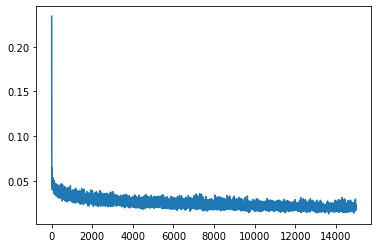

epoch:  9 	 step:0 	 loss: 0.01697
epoch:  9 	 step:100 	 loss: 0.01763
epoch:  9 	 step:200 	 loss: 0.01698
epoch:  9 	 step:300 	 loss: 0.02227
epoch:  9 	 step:400 	 loss: 0.01892
epoch:  9 	 step:500 	 loss: 0.02053
epoch:  9 	 step:600 	 loss: 0.01818
epoch:  9 	 step:700 	 loss: 0.02094
epoch:  9 	 step:800 	 loss: 0.0194
epoch:  9 	 step:900 	 loss: 0.0207
epoch:  9 	 step:1000 	 loss: 0.01796
epoch:  9 	 step:1100 	 loss: 0.01563
epoch:  9 	 step:1200 	 loss: 0.0181
epoch:  9 	 step:1300 	 loss: 0.01985
epoch:  9 	 step:1400 	 loss: 0.02049
epoch:  9 	 step:1500 	 loss: 0.02047
epoch:  9 	 step:1600 	 loss: 0.02255
epoch:  9 	 step:1700 	 loss: 0.02224
epoch:  9 	 step:1800 	 loss: 0.01694


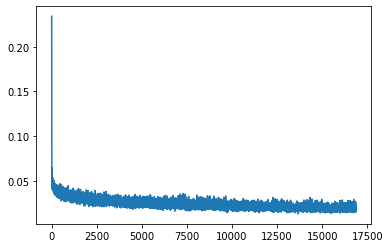

epoch: 10 	 step:0 	 loss: 0.01578
epoch: 10 	 step:100 	 loss: 0.01814
epoch: 10 	 step:200 	 loss: 0.01974
epoch: 10 	 step:300 	 loss: 0.01726
epoch: 10 	 step:400 	 loss: 0.01715
epoch: 10 	 step:500 	 loss: 0.01749
epoch: 10 	 step:600 	 loss: 0.01927
epoch: 10 	 step:700 	 loss: 0.01735
epoch: 10 	 step:800 	 loss: 0.01976
epoch: 10 	 step:900 	 loss: 0.01713
epoch: 10 	 step:1000 	 loss: 0.01839
epoch: 10 	 step:1100 	 loss: 0.01734
epoch: 10 	 step:1200 	 loss: 0.02019
epoch: 10 	 step:1300 	 loss: 0.01442
epoch: 10 	 step:1400 	 loss: 0.01738
epoch: 10 	 step:1500 	 loss: 0.01812
epoch: 10 	 step:1600 	 loss: 0.02301
epoch: 10 	 step:1700 	 loss: 0.01875
epoch: 10 	 step:1800 	 loss: 0.01698


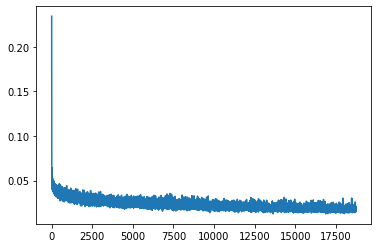

epoch: 11 	 step:0 	 loss: 0.01869
epoch: 11 	 step:100 	 loss: 0.02107
epoch: 11 	 step:200 	 loss: 0.01515
epoch: 11 	 step:300 	 loss: 0.01846
epoch: 11 	 step:400 	 loss: 0.0215
epoch: 11 	 step:500 	 loss: 0.01548
epoch: 11 	 step:600 	 loss: 0.01613
epoch: 11 	 step:700 	 loss: 0.01796
epoch: 11 	 step:800 	 loss: 0.0165
epoch: 11 	 step:900 	 loss: 0.01312
epoch: 11 	 step:1000 	 loss: 0.0161
epoch: 11 	 step:1100 	 loss: 0.01978
epoch: 11 	 step:1200 	 loss: 0.01252
epoch: 11 	 step:1300 	 loss: 0.01737
epoch: 11 	 step:1400 	 loss: 0.01747
epoch: 11 	 step:1500 	 loss: 0.01664
epoch: 11 	 step:1600 	 loss: 0.01613
epoch: 11 	 step:1700 	 loss: 0.01508
epoch: 11 	 step:1800 	 loss: 0.01598


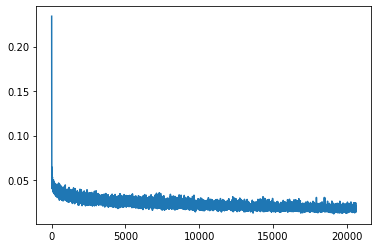

epoch: 12 	 step:0 	 loss: 0.01699
epoch: 12 	 step:100 	 loss: 0.01515
epoch: 12 	 step:200 	 loss: 0.01551
epoch: 12 	 step:300 	 loss: 0.01608
epoch: 12 	 step:400 	 loss: 0.01425
epoch: 12 	 step:500 	 loss: 0.01561
epoch: 12 	 step:600 	 loss: 0.01681
epoch: 12 	 step:700 	 loss: 0.01895
epoch: 12 	 step:800 	 loss: 0.02073
epoch: 12 	 step:900 	 loss: 0.01312
epoch: 12 	 step:1000 	 loss: 0.01927
epoch: 12 	 step:1100 	 loss: 0.01589
epoch: 12 	 step:1200 	 loss: 0.01489
epoch: 12 	 step:1300 	 loss: 0.01742
epoch: 12 	 step:1400 	 loss: 0.01846
epoch: 12 	 step:1500 	 loss: 0.01897
epoch: 12 	 step:1600 	 loss: 0.021
epoch: 12 	 step:1700 	 loss: 0.02182
epoch: 12 	 step:1800 	 loss: 0.01428


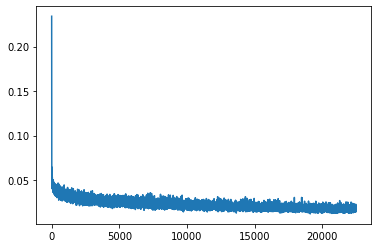

epoch: 13 	 step:0 	 loss: 0.0164
epoch: 13 	 step:100 	 loss: 0.01529
epoch: 13 	 step:200 	 loss: 0.01685
epoch: 13 	 step:300 	 loss: 0.01703
epoch: 13 	 step:400 	 loss: 0.0171
epoch: 13 	 step:500 	 loss: 0.01903
epoch: 13 	 step:600 	 loss: 0.01465
epoch: 13 	 step:700 	 loss: 0.01586
epoch: 13 	 step:800 	 loss: 0.01719
epoch: 13 	 step:900 	 loss: 0.01575
epoch: 13 	 step:1000 	 loss: 0.01458
epoch: 13 	 step:1100 	 loss: 0.01584
epoch: 13 	 step:1200 	 loss: 0.01533
epoch: 13 	 step:1300 	 loss: 0.01721
epoch: 13 	 step:1400 	 loss: 0.01957
epoch: 13 	 step:1500 	 loss: 0.01729
epoch: 13 	 step:1600 	 loss: 0.01638
epoch: 13 	 step:1700 	 loss: 0.01841
epoch: 13 	 step:1800 	 loss: 0.01639


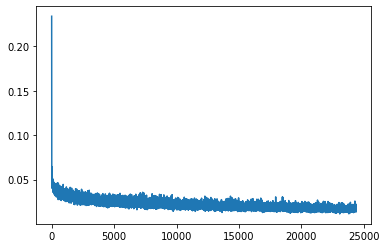

epoch: 14 	 step:0 	 loss: 0.01764
epoch: 14 	 step:100 	 loss: 0.01541
epoch: 14 	 step:200 	 loss: 0.01433
epoch: 14 	 step:300 	 loss: 0.01188
epoch: 14 	 step:400 	 loss: 0.01916
epoch: 14 	 step:500 	 loss: 0.01686
epoch: 14 	 step:600 	 loss: 0.01528
epoch: 14 	 step:700 	 loss: 0.01705
epoch: 14 	 step:800 	 loss: 0.0161
epoch: 14 	 step:900 	 loss: 0.01942
epoch: 14 	 step:1000 	 loss: 0.01521
epoch: 14 	 step:1100 	 loss: 0.01623
epoch: 14 	 step:1200 	 loss: 0.017
epoch: 14 	 step:1300 	 loss: 0.01514
epoch: 14 	 step:1400 	 loss: 0.01521
epoch: 14 	 step:1500 	 loss: 0.01553
epoch: 14 	 step:1600 	 loss: 0.0168
epoch: 14 	 step:1700 	 loss: 0.01626
epoch: 14 	 step:1800 	 loss: 0.02244


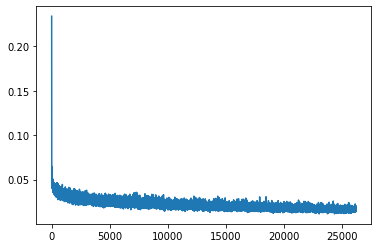

epoch: 15 	 step:0 	 loss: 0.01634
epoch: 15 	 step:100 	 loss: 0.01757
epoch: 15 	 step:200 	 loss: 0.01351
epoch: 15 	 step:300 	 loss: 0.01314
epoch: 15 	 step:400 	 loss: 0.01325
epoch: 15 	 step:500 	 loss: 0.01734
epoch: 15 	 step:600 	 loss: 0.01333
epoch: 15 	 step:700 	 loss: 0.01754
epoch: 15 	 step:800 	 loss: 0.01354
epoch: 15 	 step:900 	 loss: 0.01483
epoch: 15 	 step:1000 	 loss: 0.01315
epoch: 15 	 step:1100 	 loss: 0.01679
epoch: 15 	 step:1200 	 loss: 0.01702
epoch: 15 	 step:1300 	 loss: 0.0187
epoch: 15 	 step:1400 	 loss: 0.01467
epoch: 15 	 step:1500 	 loss: 0.01528
epoch: 15 	 step:1600 	 loss: 0.01539
epoch: 15 	 step:1700 	 loss: 0.01311
epoch: 15 	 step:1800 	 loss: 0.01737


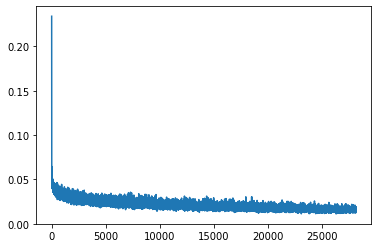

epoch: 16 	 step:0 	 loss: 0.01395
epoch: 16 	 step:100 	 loss: 0.01619
epoch: 16 	 step:200 	 loss: 0.01553
epoch: 16 	 step:300 	 loss: 0.02068
epoch: 16 	 step:400 	 loss: 0.01264
epoch: 16 	 step:500 	 loss: 0.01467
epoch: 16 	 step:600 	 loss: 0.01486
epoch: 16 	 step:700 	 loss: 0.01345
epoch: 16 	 step:800 	 loss: 0.01927
epoch: 16 	 step:900 	 loss: 0.01419
epoch: 16 	 step:1000 	 loss: 0.01439
epoch: 16 	 step:1100 	 loss: 0.01556
epoch: 16 	 step:1200 	 loss: 0.01273
epoch: 16 	 step:1300 	 loss: 0.01712
epoch: 16 	 step:1400 	 loss: 0.01668
epoch: 16 	 step:1500 	 loss: 0.01293
epoch: 16 	 step:1600 	 loss: 0.01359
epoch: 16 	 step:1700 	 loss: 0.01464
epoch: 16 	 step:1800 	 loss: 0.01544


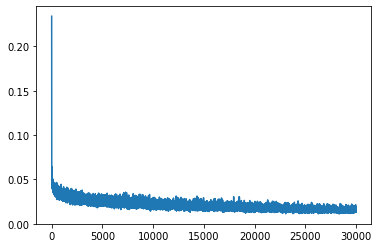

epoch: 17 	 step:0 	 loss: 0.01539
epoch: 17 	 step:100 	 loss: 0.01315
epoch: 17 	 step:200 	 loss: 0.01624
epoch: 17 	 step:300 	 loss: 0.01335
epoch: 17 	 step:400 	 loss: 0.01508
epoch: 17 	 step:500 	 loss: 0.01456
epoch: 17 	 step:600 	 loss: 0.01714
epoch: 17 	 step:700 	 loss: 0.01319
epoch: 17 	 step:800 	 loss: 0.01438
epoch: 17 	 step:900 	 loss: 0.01228
epoch: 17 	 step:1000 	 loss: 0.01613
epoch: 17 	 step:1100 	 loss: 0.01441
epoch: 17 	 step:1200 	 loss: 0.01865
epoch: 17 	 step:1300 	 loss: 0.01652
epoch: 17 	 step:1400 	 loss: 0.01427
epoch: 17 	 step:1500 	 loss: 0.01413
epoch: 17 	 step:1600 	 loss: 0.01455
epoch: 17 	 step:1700 	 loss: 0.01422
epoch: 17 	 step:1800 	 loss: 0.01559


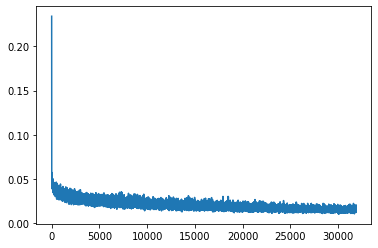

epoch: 18 	 step:0 	 loss: 0.0122
epoch: 18 	 step:100 	 loss: 0.01329
epoch: 18 	 step:200 	 loss: 0.01425
epoch: 18 	 step:300 	 loss: 0.0135
epoch: 18 	 step:400 	 loss: 0.01391
epoch: 18 	 step:500 	 loss: 0.01384
epoch: 18 	 step:600 	 loss: 0.01353
epoch: 18 	 step:700 	 loss: 0.01584
epoch: 18 	 step:800 	 loss: 0.01508
epoch: 18 	 step:900 	 loss: 0.01454
epoch: 18 	 step:1000 	 loss: 0.01318
epoch: 18 	 step:1100 	 loss: 0.01463
epoch: 18 	 step:1200 	 loss: 0.01532
epoch: 18 	 step:1300 	 loss: 0.01713
epoch: 18 	 step:1400 	 loss: 0.01495
epoch: 18 	 step:1500 	 loss: 0.01572
epoch: 18 	 step:1600 	 loss: 0.01238
epoch: 18 	 step:1700 	 loss: 0.01798
epoch: 18 	 step:1800 	 loss: 0.01414


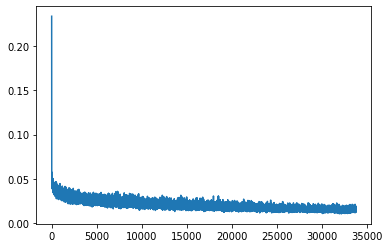

epoch: 19 	 step:0 	 loss: 0.01383
epoch: 19 	 step:100 	 loss: 0.01315
epoch: 19 	 step:200 	 loss: 0.01342
epoch: 19 	 step:300 	 loss: 0.0114
epoch: 19 	 step:400 	 loss: 0.01194
epoch: 19 	 step:500 	 loss: 0.01375
epoch: 19 	 step:600 	 loss: 0.01402
epoch: 19 	 step:700 	 loss: 0.01279
epoch: 19 	 step:800 	 loss: 0.01205
epoch: 19 	 step:900 	 loss: 0.01279
epoch: 19 	 step:1000 	 loss: 0.01585
epoch: 19 	 step:1100 	 loss: 0.01243
epoch: 19 	 step:1200 	 loss: 0.01562
epoch: 19 	 step:1300 	 loss: 0.01288
epoch: 19 	 step:1400 	 loss: 0.01298
epoch: 19 	 step:1500 	 loss: 0.0137
epoch: 19 	 step:1600 	 loss: 0.01302
epoch: 19 	 step:1700 	 loss: 0.01399
epoch: 19 	 step:1800 	 loss: 0.01563


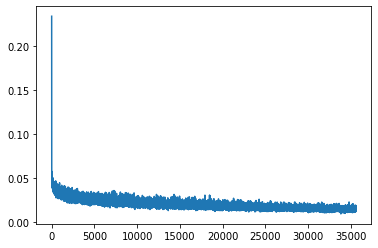

epoch: 20 	 step:0 	 loss: 0.01314
epoch: 20 	 step:100 	 loss: 0.01499
epoch: 20 	 step:200 	 loss: 0.01265
epoch: 20 	 step:300 	 loss: 0.01437
epoch: 20 	 step:400 	 loss: 0.01335
epoch: 20 	 step:500 	 loss: 0.01324
epoch: 20 	 step:600 	 loss: 0.0119
epoch: 20 	 step:700 	 loss: 0.01374
epoch: 20 	 step:800 	 loss: 0.01312
epoch: 20 	 step:900 	 loss: 0.01375
epoch: 20 	 step:1000 	 loss: 0.01435
epoch: 20 	 step:1100 	 loss: 0.01485
epoch: 20 	 step:1200 	 loss: 0.01315
epoch: 20 	 step:1300 	 loss: 0.01278
epoch: 20 	 step:1400 	 loss: 0.01237
epoch: 20 	 step:1500 	 loss: 0.01426
epoch: 20 	 step:1600 	 loss: 0.01345
epoch: 20 	 step:1700 	 loss: 0.01257
epoch: 20 	 step:1800 	 loss: 0.01544


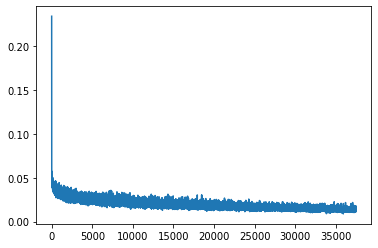

epoch: 21 	 step:0 	 loss: 0.0123
epoch: 21 	 step:100 	 loss: 0.0127
epoch: 21 	 step:200 	 loss: 0.01189
epoch: 21 	 step:300 	 loss: 0.01205
epoch: 21 	 step:400 	 loss: 0.011
epoch: 21 	 step:500 	 loss: 0.01051
epoch: 21 	 step:600 	 loss: 0.01322
epoch: 21 	 step:700 	 loss: 0.01255
epoch: 21 	 step:800 	 loss: 0.01297
epoch: 21 	 step:900 	 loss: 0.01172
epoch: 21 	 step:1000 	 loss: 0.01312
epoch: 21 	 step:1100 	 loss: 0.0119
epoch: 21 	 step:1200 	 loss: 0.01124
epoch: 21 	 step:1300 	 loss: 0.01362
epoch: 21 	 step:1400 	 loss: 0.01247
epoch: 21 	 step:1500 	 loss: 0.01116
epoch: 21 	 step:1600 	 loss: 0.01336
epoch: 21 	 step:1700 	 loss: 0.01461
epoch: 21 	 step:1800 	 loss: 0.01286


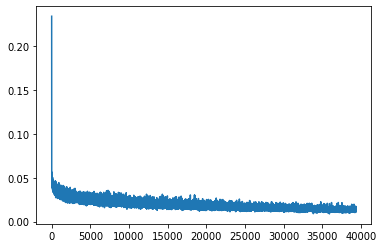

epoch: 22 	 step:0 	 loss: 0.01115
epoch: 22 	 step:100 	 loss: 0.01186
epoch: 22 	 step:200 	 loss: 0.01038
epoch: 22 	 step:300 	 loss: 0.01277
epoch: 22 	 step:400 	 loss: 0.01277
epoch: 22 	 step:500 	 loss: 0.01086
epoch: 22 	 step:600 	 loss: 0.01428
epoch: 22 	 step:700 	 loss: 0.0127
epoch: 22 	 step:800 	 loss: 0.01336
epoch: 22 	 step:900 	 loss: 0.01315
epoch: 22 	 step:1000 	 loss: 0.01233
epoch: 22 	 step:1100 	 loss: 0.0126
epoch: 22 	 step:1200 	 loss: 0.01367
epoch: 22 	 step:1300 	 loss: 0.01282
epoch: 22 	 step:1400 	 loss: 0.01264
epoch: 22 	 step:1500 	 loss: 0.01437
epoch: 22 	 step:1600 	 loss: 0.01169
epoch: 22 	 step:1700 	 loss: 0.01107
epoch: 22 	 step:1800 	 loss: 0.01232


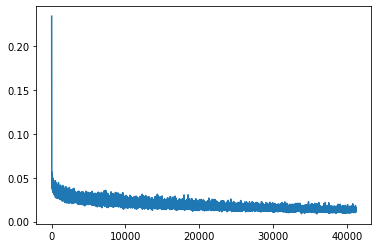

epoch: 23 	 step:0 	 loss: 0.01128
epoch: 23 	 step:100 	 loss: 0.01103
epoch: 23 	 step:200 	 loss: 0.01042
epoch: 23 	 step:300 	 loss: 0.01111
epoch: 23 	 step:400 	 loss: 0.01158
epoch: 23 	 step:500 	 loss: 0.01074
epoch: 23 	 step:600 	 loss: 0.01239
epoch: 23 	 step:700 	 loss: 0.0108
epoch: 23 	 step:800 	 loss: 0.01236
epoch: 23 	 step:900 	 loss: 0.01253
epoch: 23 	 step:1000 	 loss: 0.01264
epoch: 23 	 step:1100 	 loss: 0.0128
epoch: 23 	 step:1200 	 loss: 0.01117
epoch: 23 	 step:1300 	 loss: 0.01045
epoch: 23 	 step:1400 	 loss: 0.01437
epoch: 23 	 step:1500 	 loss: 0.01064
epoch: 23 	 step:1600 	 loss: 0.01344
epoch: 23 	 step:1700 	 loss: 0.01149
epoch: 23 	 step:1800 	 loss: 0.0128


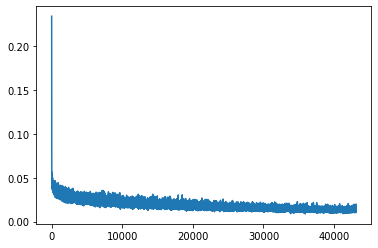

epoch: 24 	 step:0 	 loss: 0.01157
epoch: 24 	 step:100 	 loss: 0.0119
epoch: 24 	 step:200 	 loss: 0.01223
epoch: 24 	 step:300 	 loss: 0.01162
epoch: 24 	 step:400 	 loss: 0.01383
epoch: 24 	 step:500 	 loss: 0.01267
epoch: 24 	 step:600 	 loss: 0.0114
epoch: 24 	 step:700 	 loss: 0.01134
epoch: 24 	 step:800 	 loss: 0.01034
epoch: 24 	 step:900 	 loss: 0.01232
epoch: 24 	 step:1000 	 loss: 0.01359
epoch: 24 	 step:1100 	 loss: 0.01347
epoch: 24 	 step:1200 	 loss: 0.01201
epoch: 24 	 step:1300 	 loss: 0.01019
epoch: 24 	 step:1400 	 loss: 0.01237
epoch: 24 	 step:1500 	 loss: 0.01186
epoch: 24 	 step:1600 	 loss: 0.009903
epoch: 24 	 step:1700 	 loss: 0.0142
epoch: 24 	 step:1800 	 loss: 0.01164


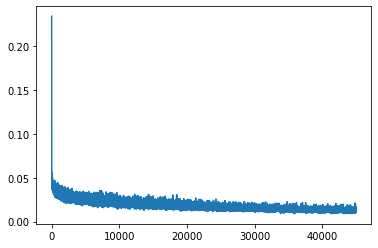

epoch: 25 	 step:0 	 loss: 0.01216
epoch: 25 	 step:100 	 loss: 0.009647
epoch: 25 	 step:200 	 loss: 0.01103
epoch: 25 	 step:300 	 loss: 0.01133
epoch: 25 	 step:400 	 loss: 0.0128
epoch: 25 	 step:500 	 loss: 0.01003
epoch: 25 	 step:600 	 loss: 0.01253
epoch: 25 	 step:700 	 loss: 0.01273
epoch: 25 	 step:800 	 loss: 0.0129
epoch: 25 	 step:900 	 loss: 0.01204
epoch: 25 	 step:1000 	 loss: 0.01326
epoch: 25 	 step:1100 	 loss: 0.0109
epoch: 25 	 step:1200 	 loss: 0.01205
epoch: 25 	 step:1300 	 loss: 0.012
epoch: 25 	 step:1400 	 loss: 0.01255
epoch: 25 	 step:1500 	 loss: 0.01224
epoch: 25 	 step:1600 	 loss: 0.01023
epoch: 25 	 step:1700 	 loss: 0.01341
epoch: 25 	 step:1800 	 loss: 0.01324


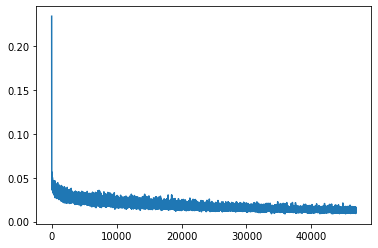

epoch: 26 	 step:0 	 loss: 0.01172
epoch: 26 	 step:100 	 loss: 0.01324
epoch: 26 	 step:200 	 loss: 0.01057
epoch: 26 	 step:300 	 loss: 0.01097
epoch: 26 	 step:400 	 loss: 0.01071
epoch: 26 	 step:500 	 loss: 0.01127
epoch: 26 	 step:600 	 loss: 0.01074
epoch: 26 	 step:700 	 loss: 0.01258
epoch: 26 	 step:800 	 loss: 0.01041
epoch: 26 	 step:900 	 loss: 0.01222
epoch: 26 	 step:1000 	 loss: 0.01433
epoch: 26 	 step:1100 	 loss: 0.01164
epoch: 26 	 step:1200 	 loss: 0.01215
epoch: 26 	 step:1300 	 loss: 0.01124
epoch: 26 	 step:1400 	 loss: 0.01166
epoch: 26 	 step:1500 	 loss: 0.01266
epoch: 26 	 step:1600 	 loss: 0.01012
epoch: 26 	 step:1700 	 loss: 0.01624
epoch: 26 	 step:1800 	 loss: 0.01112


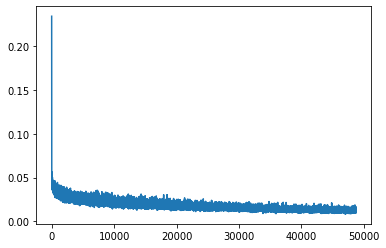

epoch: 27 	 step:0 	 loss: 0.01072
epoch: 27 	 step:100 	 loss: 0.009709
epoch: 27 	 step:200 	 loss: 0.009389
epoch: 27 	 step:300 	 loss: 0.01022
epoch: 27 	 step:400 	 loss: 0.01125
epoch: 27 	 step:500 	 loss: 0.01045
epoch: 27 	 step:600 	 loss: 0.01209
epoch: 27 	 step:700 	 loss: 0.01022
epoch: 27 	 step:800 	 loss: 0.01153
epoch: 27 	 step:900 	 loss: 0.01254
epoch: 27 	 step:1000 	 loss: 0.01131
epoch: 27 	 step:1100 	 loss: 0.01072
epoch: 27 	 step:1200 	 loss: 0.01327
epoch: 27 	 step:1300 	 loss: 0.01066
epoch: 27 	 step:1400 	 loss: 0.01178
epoch: 27 	 step:1500 	 loss: 0.01029
epoch: 27 	 step:1600 	 loss: 0.009347
epoch: 27 	 step:1700 	 loss: 0.01109
epoch: 27 	 step:1800 	 loss: 0.01129


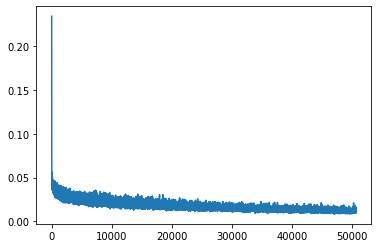

epoch: 28 	 step:0 	 loss: 0.01462
epoch: 28 	 step:100 	 loss: 0.01118
epoch: 28 	 step:200 	 loss: 0.01172
epoch: 28 	 step:300 	 loss: 0.009815
epoch: 28 	 step:400 	 loss: 0.01177
epoch: 28 	 step:500 	 loss: 0.01129
epoch: 28 	 step:600 	 loss: 0.01275
epoch: 28 	 step:700 	 loss: 0.01154
epoch: 28 	 step:800 	 loss: 0.01097
epoch: 28 	 step:900 	 loss: 0.009748
epoch: 28 	 step:1000 	 loss: 0.01319
epoch: 28 	 step:1100 	 loss: 0.011
epoch: 28 	 step:1200 	 loss: 0.01026
epoch: 28 	 step:1300 	 loss: 0.01095
epoch: 28 	 step:1400 	 loss: 0.01214
epoch: 28 	 step:1500 	 loss: 0.01124
epoch: 28 	 step:1600 	 loss: 0.01109
epoch: 28 	 step:1700 	 loss: 0.01037
epoch: 28 	 step:1800 	 loss: 0.01124


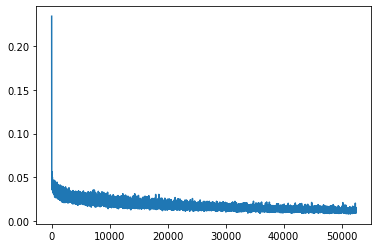

epoch: 29 	 step:0 	 loss: 0.01012
epoch: 29 	 step:100 	 loss: 0.01142
epoch: 29 	 step:200 	 loss: 0.01061
epoch: 29 	 step:300 	 loss: 0.008777
epoch: 29 	 step:400 	 loss: 0.00921
epoch: 29 	 step:500 	 loss: 0.01056
epoch: 29 	 step:600 	 loss: 0.01159
epoch: 29 	 step:700 	 loss: 0.01115
epoch: 29 	 step:800 	 loss: 0.01093
epoch: 29 	 step:900 	 loss: 0.01203
epoch: 29 	 step:1000 	 loss: 0.01188
epoch: 29 	 step:1100 	 loss: 0.01175
epoch: 29 	 step:1200 	 loss: 0.01121
epoch: 29 	 step:1300 	 loss: 0.01012
epoch: 29 	 step:1400 	 loss: 0.0112
epoch: 29 	 step:1500 	 loss: 0.01006
epoch: 29 	 step:1600 	 loss: 0.01209
epoch: 29 	 step:1700 	 loss: 0.01085
epoch: 29 	 step:1800 	 loss: 0.01135


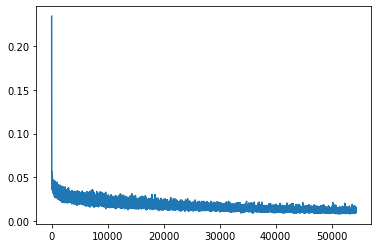

epoch: 30 	 step:0 	 loss: 0.009572
epoch: 30 	 step:100 	 loss: 0.01072
epoch: 30 	 step:200 	 loss: 0.0103
epoch: 30 	 step:300 	 loss: 0.01028
epoch: 30 	 step:400 	 loss: 0.01039
epoch: 30 	 step:500 	 loss: 0.009188
epoch: 30 	 step:600 	 loss: 0.01064
epoch: 30 	 step:700 	 loss: 0.01056
epoch: 30 	 step:800 	 loss: 0.01116
epoch: 30 	 step:900 	 loss: 0.01099
epoch: 30 	 step:1000 	 loss: 0.01046
epoch: 30 	 step:1100 	 loss: 0.01123
epoch: 30 	 step:1200 	 loss: 0.01022
epoch: 30 	 step:1300 	 loss: 0.01121
epoch: 30 	 step:1400 	 loss: 0.0115
epoch: 30 	 step:1500 	 loss: 0.01141
epoch: 30 	 step:1600 	 loss: 0.009429
epoch: 30 	 step:1700 	 loss: 0.009425
epoch: 30 	 step:1800 	 loss: 0.01042


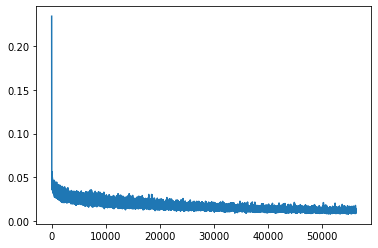

epoch: 31 	 step:0 	 loss: 0.01012
epoch: 31 	 step:100 	 loss: 0.009336
epoch: 31 	 step:200 	 loss: 0.009256
epoch: 31 	 step:300 	 loss: 0.00913
epoch: 31 	 step:400 	 loss: 0.01003
epoch: 31 	 step:500 	 loss: 0.01002
epoch: 31 	 step:600 	 loss: 0.009555
epoch: 31 	 step:700 	 loss: 0.01042
epoch: 31 	 step:800 	 loss: 0.01057
epoch: 31 	 step:900 	 loss: 0.01124
epoch: 31 	 step:1000 	 loss: 0.00935
epoch: 31 	 step:1100 	 loss: 0.01045
epoch: 31 	 step:1200 	 loss: 0.009313
epoch: 31 	 step:1300 	 loss: 0.009965
epoch: 31 	 step:1400 	 loss: 0.01124
epoch: 31 	 step:1500 	 loss: 0.01099
epoch: 31 	 step:1600 	 loss: 0.009691
epoch: 31 	 step:1700 	 loss: 0.01018
epoch: 31 	 step:1800 	 loss: 0.01107


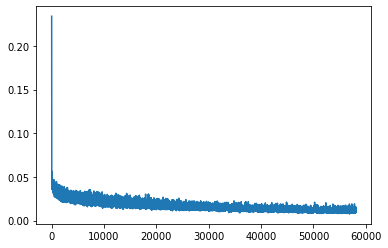

epoch: 32 	 step:0 	 loss: 0.009829
epoch: 32 	 step:100 	 loss: 0.009072
epoch: 32 	 step:200 	 loss: 0.009064
epoch: 32 	 step:300 	 loss: 0.009731
epoch: 32 	 step:400 	 loss: 0.01042
epoch: 32 	 step:500 	 loss: 0.009091
epoch: 32 	 step:600 	 loss: 0.008995
epoch: 32 	 step:700 	 loss: 0.01232
epoch: 32 	 step:800 	 loss: 0.01013
epoch: 32 	 step:900 	 loss: 0.01058
epoch: 32 	 step:1000 	 loss: 0.009841
epoch: 32 	 step:1100 	 loss: 0.01105
epoch: 32 	 step:1200 	 loss: 0.00937
epoch: 32 	 step:1300 	 loss: 0.009254
epoch: 32 	 step:1400 	 loss: 0.01064
epoch: 32 	 step:1500 	 loss: 0.009965
epoch: 32 	 step:1600 	 loss: 0.009569
epoch: 32 	 step:1700 	 loss: 0.01054
epoch: 32 	 step:1800 	 loss: 0.01148


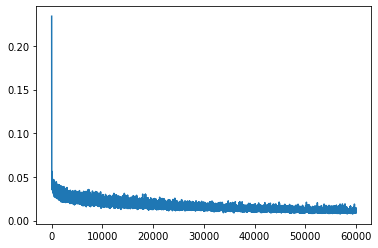

epoch: 33 	 step:0 	 loss: 0.01598
epoch: 33 	 step:100 	 loss: 0.009549
epoch: 33 	 step:200 	 loss: 0.01126
epoch: 33 	 step:300 	 loss: 0.009395
epoch: 33 	 step:400 	 loss: 0.01055
epoch: 33 	 step:500 	 loss: 0.009065
epoch: 33 	 step:600 	 loss: 0.0113
epoch: 33 	 step:700 	 loss: 0.008051
epoch: 33 	 step:800 	 loss: 0.009922
epoch: 33 	 step:900 	 loss: 0.009907
epoch: 33 	 step:1000 	 loss: 0.009044
epoch: 33 	 step:1100 	 loss: 0.01087
epoch: 33 	 step:1200 	 loss: 0.01133
epoch: 33 	 step:1300 	 loss: 0.01011
epoch: 33 	 step:1400 	 loss: 0.009142
epoch: 33 	 step:1500 	 loss: 0.009102
epoch: 33 	 step:1600 	 loss: 0.01499
epoch: 33 	 step:1700 	 loss: 0.01082
epoch: 33 	 step:1800 	 loss: 0.009203


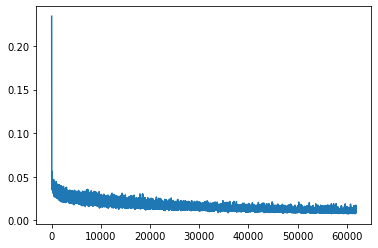

epoch: 34 	 step:0 	 loss: 0.008485
epoch: 34 	 step:100 	 loss: 0.008989
epoch: 34 	 step:200 	 loss: 0.009778
epoch: 34 	 step:300 	 loss: 0.008864
epoch: 34 	 step:400 	 loss: 0.009219
epoch: 34 	 step:500 	 loss: 0.01057
epoch: 34 	 step:600 	 loss: 0.008973
epoch: 34 	 step:700 	 loss: 0.008658
epoch: 34 	 step:800 	 loss: 0.009137
epoch: 34 	 step:900 	 loss: 0.009168
epoch: 34 	 step:1000 	 loss: 0.01142
epoch: 34 	 step:1100 	 loss: 0.01017
epoch: 34 	 step:1200 	 loss: 0.009544
epoch: 34 	 step:1300 	 loss: 0.01063
epoch: 34 	 step:1400 	 loss: 0.01054
epoch: 34 	 step:1500 	 loss: 0.0116
epoch: 34 	 step:1600 	 loss: 0.01063
epoch: 34 	 step:1700 	 loss: 0.01005
epoch: 34 	 step:1800 	 loss: 0.009836


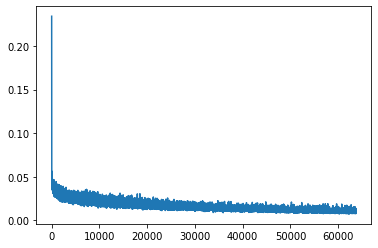

epoch: 35 	 step:0 	 loss: 0.009673
epoch: 35 	 step:100 	 loss: 0.009655
epoch: 35 	 step:200 	 loss: 0.009199
epoch: 35 	 step:300 	 loss: 0.009016
epoch: 35 	 step:400 	 loss: 0.00883
epoch: 35 	 step:500 	 loss: 0.009508
epoch: 35 	 step:600 	 loss: 0.01094
epoch: 35 	 step:700 	 loss: 0.01076
epoch: 35 	 step:800 	 loss: 0.009449
epoch: 35 	 step:900 	 loss: 0.009933
epoch: 35 	 step:1000 	 loss: 0.009249
epoch: 35 	 step:1100 	 loss: 0.009739
epoch: 35 	 step:1200 	 loss: 0.00959
epoch: 35 	 step:1300 	 loss: 0.009465
epoch: 35 	 step:1400 	 loss: 0.009929
epoch: 35 	 step:1500 	 loss: 0.0106
epoch: 35 	 step:1600 	 loss: 0.008975
epoch: 35 	 step:1700 	 loss: 0.01268
epoch: 35 	 step:1800 	 loss: 0.009612


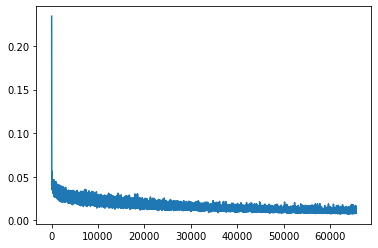

epoch: 36 	 step:0 	 loss: 0.008367
epoch: 36 	 step:100 	 loss: 0.008901
epoch: 36 	 step:200 	 loss: 0.0086
epoch: 36 	 step:300 	 loss: 0.008075
epoch: 36 	 step:400 	 loss: 0.008396
epoch: 36 	 step:500 	 loss: 0.009302
epoch: 36 	 step:600 	 loss: 0.009911
epoch: 36 	 step:700 	 loss: 0.008302
epoch: 36 	 step:800 	 loss: 0.00961
epoch: 36 	 step:900 	 loss: 0.009792
epoch: 36 	 step:1000 	 loss: 0.01031
epoch: 36 	 step:1100 	 loss: 0.009697
epoch: 36 	 step:1200 	 loss: 0.01063
epoch: 36 	 step:1300 	 loss: 0.009853
epoch: 36 	 step:1400 	 loss: 0.0098
epoch: 36 	 step:1500 	 loss: 0.009528
epoch: 36 	 step:1600 	 loss: 0.01198
epoch: 36 	 step:1700 	 loss: 0.009645
epoch: 36 	 step:1800 	 loss: 0.009294


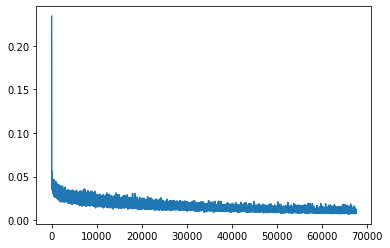

epoch: 37 	 step:0 	 loss: 0.00943
epoch: 37 	 step:100 	 loss: 0.007797
epoch: 37 	 step:200 	 loss: 0.008542
epoch: 37 	 step:300 	 loss: 0.009586
epoch: 37 	 step:400 	 loss: 0.008638
epoch: 37 	 step:500 	 loss: 0.009027
epoch: 37 	 step:600 	 loss: 0.008932
epoch: 37 	 step:700 	 loss: 0.009636
epoch: 37 	 step:800 	 loss: 0.009448
epoch: 37 	 step:900 	 loss: 0.008458
epoch: 37 	 step:1000 	 loss: 0.009394
epoch: 37 	 step:1100 	 loss: 0.009089
epoch: 37 	 step:1200 	 loss: 0.008886
epoch: 37 	 step:1300 	 loss: 0.009385
epoch: 37 	 step:1400 	 loss: 0.01
epoch: 37 	 step:1500 	 loss: 0.008879
epoch: 37 	 step:1600 	 loss: 0.008602
epoch: 37 	 step:1700 	 loss: 0.01018
epoch: 37 	 step:1800 	 loss: 0.009852


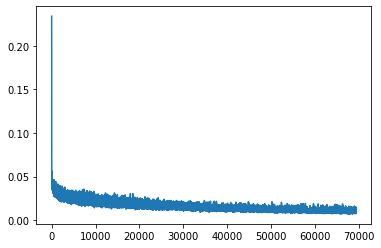

epoch: 38 	 step:0 	 loss: 0.008125
epoch: 38 	 step:100 	 loss: 0.008422
epoch: 38 	 step:200 	 loss: 0.009323
epoch: 38 	 step:300 	 loss: 0.008944
epoch: 38 	 step:400 	 loss: 0.008434
epoch: 38 	 step:500 	 loss: 0.009115
epoch: 38 	 step:600 	 loss: 0.008684
epoch: 38 	 step:700 	 loss: 0.009454
epoch: 38 	 step:800 	 loss: 0.008286
epoch: 38 	 step:900 	 loss: 0.01291
epoch: 38 	 step:1000 	 loss: 0.008774
epoch: 38 	 step:1100 	 loss: 0.008175
epoch: 38 	 step:1200 	 loss: 0.008101
epoch: 38 	 step:1300 	 loss: 0.008901
epoch: 38 	 step:1400 	 loss: 0.008197
epoch: 38 	 step:1500 	 loss: 0.01037
epoch: 38 	 step:1600 	 loss: 0.01008
epoch: 38 	 step:1700 	 loss: 0.01223
epoch: 38 	 step:1800 	 loss: 0.01014


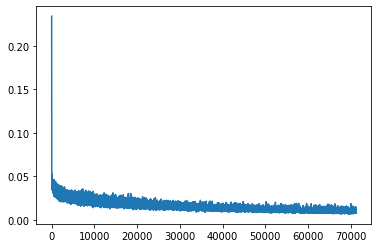

epoch: 39 	 step:0 	 loss: 0.009879
epoch: 39 	 step:100 	 loss: 0.007705
epoch: 39 	 step:200 	 loss: 0.009428
epoch: 39 	 step:300 	 loss: 0.008501
epoch: 39 	 step:400 	 loss: 0.008668
epoch: 39 	 step:500 	 loss: 0.007917
epoch: 39 	 step:600 	 loss: 0.009489
epoch: 39 	 step:700 	 loss: 0.008885
epoch: 39 	 step:800 	 loss: 0.009613
epoch: 39 	 step:900 	 loss: 0.008248
epoch: 39 	 step:1000 	 loss: 0.009044
epoch: 39 	 step:1100 	 loss: 0.008513
epoch: 39 	 step:1200 	 loss: 0.00782
epoch: 39 	 step:1300 	 loss: 0.009293
epoch: 39 	 step:1400 	 loss: 0.009832
epoch: 39 	 step:1500 	 loss: 0.008266
epoch: 39 	 step:1600 	 loss: 0.008697
epoch: 39 	 step:1700 	 loss: 0.01021
epoch: 39 	 step:1800 	 loss: 0.008284


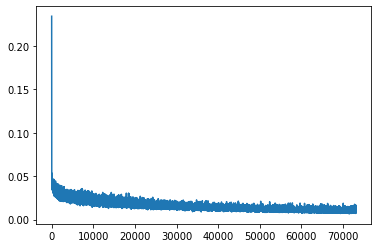

epoch: 40 	 step:0 	 loss: 0.008357
epoch: 40 	 step:100 	 loss: 0.01006
epoch: 40 	 step:200 	 loss: 0.009849
epoch: 40 	 step:300 	 loss: 0.007678
epoch: 40 	 step:400 	 loss: 0.008404
epoch: 40 	 step:500 	 loss: 0.008346
epoch: 40 	 step:600 	 loss: 0.009193
epoch: 40 	 step:700 	 loss: 0.008798
epoch: 40 	 step:800 	 loss: 0.008416
epoch: 40 	 step:900 	 loss: 0.008666
epoch: 40 	 step:1000 	 loss: 0.009754
epoch: 40 	 step:1100 	 loss: 0.008287
epoch: 40 	 step:1200 	 loss: 0.009543
epoch: 40 	 step:1300 	 loss: 0.00913
epoch: 40 	 step:1400 	 loss: 0.00757
epoch: 40 	 step:1500 	 loss: 0.008674
epoch: 40 	 step:1600 	 loss: 0.008998
epoch: 40 	 step:1700 	 loss: 0.01035
epoch: 40 	 step:1800 	 loss: 0.009209


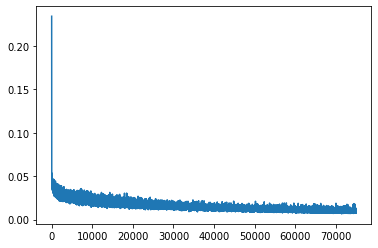

epoch: 41 	 step:0 	 loss: 0.009459
epoch: 41 	 step:100 	 loss: 0.01009
epoch: 41 	 step:200 	 loss: 0.008148
epoch: 41 	 step:300 	 loss: 0.008917
epoch: 41 	 step:400 	 loss: 0.00892
epoch: 41 	 step:500 	 loss: 0.0117
epoch: 41 	 step:600 	 loss: 0.009952
epoch: 41 	 step:700 	 loss: 0.009388
epoch: 41 	 step:800 	 loss: 0.008125
epoch: 41 	 step:900 	 loss: 0.008064
epoch: 41 	 step:1000 	 loss: 0.008099
epoch: 41 	 step:1100 	 loss: 0.00776
epoch: 41 	 step:1200 	 loss: 0.008286
epoch: 41 	 step:1300 	 loss: 0.00954
epoch: 41 	 step:1400 	 loss: 0.01568
epoch: 41 	 step:1500 	 loss: 0.008885
epoch: 41 	 step:1600 	 loss: 0.008752
epoch: 41 	 step:1700 	 loss: 0.01037
epoch: 41 	 step:1800 	 loss: 0.009053


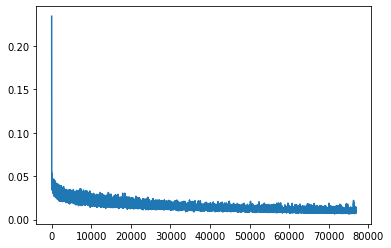

epoch: 42 	 step:0 	 loss: 0.007051
epoch: 42 	 step:100 	 loss: 0.008803
epoch: 42 	 step:200 	 loss: 0.008297
epoch: 42 	 step:300 	 loss: 0.007806
epoch: 42 	 step:400 	 loss: 0.007546
epoch: 42 	 step:500 	 loss: 0.007544
epoch: 42 	 step:600 	 loss: 0.008417
epoch: 42 	 step:700 	 loss: 0.007864
epoch: 42 	 step:800 	 loss: 0.008301
epoch: 42 	 step:900 	 loss: 0.008666
epoch: 42 	 step:1000 	 loss: 0.0112
epoch: 42 	 step:1100 	 loss: 0.01135
epoch: 42 	 step:1200 	 loss: 0.009487
epoch: 42 	 step:1300 	 loss: 0.009557
epoch: 42 	 step:1400 	 loss: 0.008316
epoch: 42 	 step:1500 	 loss: 0.00813
epoch: 42 	 step:1600 	 loss: 0.009096
epoch: 42 	 step:1700 	 loss: 0.007587
epoch: 42 	 step:1800 	 loss: 0.009155


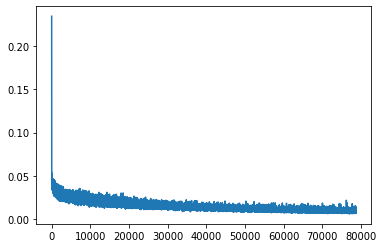

epoch: 43 	 step:0 	 loss: 0.00702
epoch: 43 	 step:100 	 loss: 0.007844
epoch: 43 	 step:200 	 loss: 0.007372
epoch: 43 	 step:300 	 loss: 0.008743
epoch: 43 	 step:400 	 loss: 0.008735
epoch: 43 	 step:500 	 loss: 0.008522
epoch: 43 	 step:600 	 loss: 0.008393
epoch: 43 	 step:700 	 loss: 0.008256
epoch: 43 	 step:800 	 loss: 0.007418
epoch: 43 	 step:900 	 loss: 0.00777
epoch: 43 	 step:1000 	 loss: 0.008256
epoch: 43 	 step:1100 	 loss: 0.009475
epoch: 43 	 step:1200 	 loss: 0.01004
epoch: 43 	 step:1300 	 loss: 0.008756
epoch: 43 	 step:1400 	 loss: 0.009012
epoch: 43 	 step:1500 	 loss: 0.008741
epoch: 43 	 step:1600 	 loss: 0.008566
epoch: 43 	 step:1700 	 loss: 0.008353
epoch: 43 	 step:1800 	 loss: 0.009094


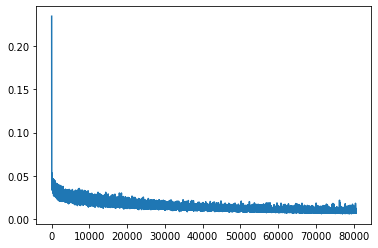

epoch: 44 	 step:0 	 loss: 0.006895
epoch: 44 	 step:100 	 loss: 0.009298
epoch: 44 	 step:200 	 loss: 0.008571
epoch: 44 	 step:300 	 loss: 0.007727
epoch: 44 	 step:400 	 loss: 0.008601
epoch: 44 	 step:500 	 loss: 0.007762
epoch: 44 	 step:600 	 loss: 0.007775
epoch: 44 	 step:700 	 loss: 0.008071
epoch: 44 	 step:800 	 loss: 0.008146
epoch: 44 	 step:900 	 loss: 0.007376
epoch: 44 	 step:1000 	 loss: 0.01101
epoch: 44 	 step:1100 	 loss: 0.008984
epoch: 44 	 step:1200 	 loss: 0.00791
epoch: 44 	 step:1300 	 loss: 0.008117
epoch: 44 	 step:1400 	 loss: 0.008467
epoch: 44 	 step:1500 	 loss: 0.009242
epoch: 44 	 step:1600 	 loss: 0.009769
epoch: 44 	 step:1700 	 loss: 0.008012
epoch: 44 	 step:1800 	 loss: 0.008572


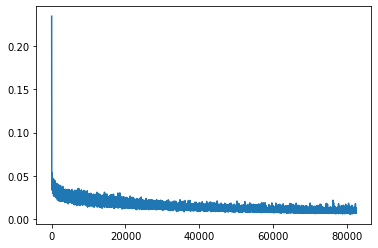

epoch: 45 	 step:0 	 loss: 0.009091
epoch: 45 	 step:100 	 loss: 0.007122
epoch: 45 	 step:200 	 loss: 0.006749
epoch: 45 	 step:300 	 loss: 0.007076
epoch: 45 	 step:400 	 loss: 0.006601
epoch: 45 	 step:500 	 loss: 0.00661
epoch: 45 	 step:600 	 loss: 0.008002
epoch: 45 	 step:700 	 loss: 0.00713
epoch: 45 	 step:800 	 loss: 0.00807
epoch: 45 	 step:900 	 loss: 0.008395
epoch: 45 	 step:1000 	 loss: 0.007368
epoch: 45 	 step:1100 	 loss: 0.008799
epoch: 45 	 step:1200 	 loss: 0.007811
epoch: 45 	 step:1300 	 loss: 0.009011
epoch: 45 	 step:1400 	 loss: 0.007558
epoch: 45 	 step:1500 	 loss: 0.01052
epoch: 45 	 step:1600 	 loss: 0.007847
epoch: 45 	 step:1700 	 loss: 0.007237
epoch: 45 	 step:1800 	 loss: 0.008017


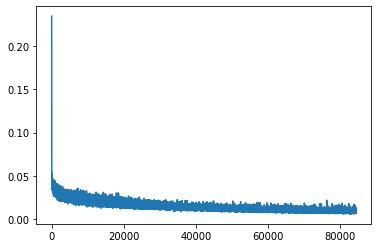

epoch: 46 	 step:0 	 loss: 0.008138
epoch: 46 	 step:100 	 loss: 0.007153
epoch: 46 	 step:200 	 loss: 0.008195
epoch: 46 	 step:300 	 loss: 0.008193
epoch: 46 	 step:400 	 loss: 0.00715
epoch: 46 	 step:500 	 loss: 0.008594
epoch: 46 	 step:600 	 loss: 0.007459
epoch: 46 	 step:700 	 loss: 0.01017
epoch: 46 	 step:800 	 loss: 0.008795
epoch: 46 	 step:900 	 loss: 0.007641
epoch: 46 	 step:1000 	 loss: 0.00771
epoch: 46 	 step:1100 	 loss: 0.009302
epoch: 46 	 step:1200 	 loss: 0.007306
epoch: 46 	 step:1300 	 loss: 0.007702
epoch: 46 	 step:1400 	 loss: 0.008054
epoch: 46 	 step:1500 	 loss: 0.007533
epoch: 46 	 step:1600 	 loss: 0.008969
epoch: 46 	 step:1700 	 loss: 0.008175
epoch: 46 	 step:1800 	 loss: 0.009419


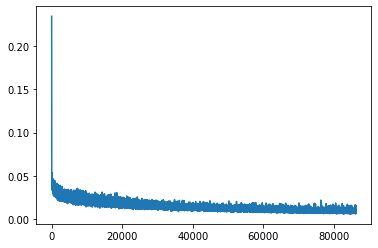

epoch: 47 	 step:0 	 loss: 0.007528
epoch: 47 	 step:100 	 loss: 0.008397
epoch: 47 	 step:200 	 loss: 0.007731
epoch: 47 	 step:300 	 loss: 0.008576
epoch: 47 	 step:400 	 loss: 0.008504
epoch: 47 	 step:500 	 loss: 0.008001
epoch: 47 	 step:600 	 loss: 0.008913
epoch: 47 	 step:700 	 loss: 0.007398
epoch: 47 	 step:800 	 loss: 0.008049
epoch: 47 	 step:900 	 loss: 0.007872
epoch: 47 	 step:1000 	 loss: 0.008419
epoch: 47 	 step:1100 	 loss: 0.0081
epoch: 47 	 step:1200 	 loss: 0.008157
epoch: 47 	 step:1300 	 loss: 0.008319
epoch: 47 	 step:1400 	 loss: 0.008176
epoch: 47 	 step:1500 	 loss: 0.008311
epoch: 47 	 step:1600 	 loss: 0.01256
epoch: 47 	 step:1700 	 loss: 0.008302
epoch: 47 	 step:1800 	 loss: 0.007372


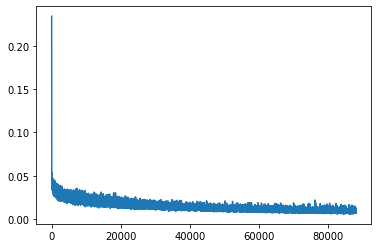

epoch: 48 	 step:0 	 loss: 0.008571
epoch: 48 	 step:100 	 loss: 0.009217
epoch: 48 	 step:200 	 loss: 0.007601
epoch: 48 	 step:300 	 loss: 0.007437
epoch: 48 	 step:400 	 loss: 0.007165
epoch: 48 	 step:500 	 loss: 0.008706
epoch: 48 	 step:600 	 loss: 0.007508
epoch: 48 	 step:700 	 loss: 0.008422
epoch: 48 	 step:800 	 loss: 0.007917
epoch: 48 	 step:900 	 loss: 0.007571
epoch: 48 	 step:1000 	 loss: 0.009499
epoch: 48 	 step:1100 	 loss: 0.007858
epoch: 48 	 step:1200 	 loss: 0.008698
epoch: 48 	 step:1300 	 loss: 0.009575
epoch: 48 	 step:1400 	 loss: 0.01119
epoch: 48 	 step:1500 	 loss: 0.01222
epoch: 48 	 step:1600 	 loss: 0.008837
epoch: 48 	 step:1700 	 loss: 0.0105
epoch: 48 	 step:1800 	 loss: 0.008713


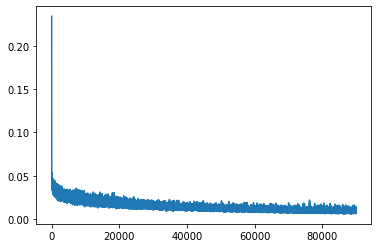

epoch: 49 	 step:0 	 loss: 0.007905
epoch: 49 	 step:100 	 loss: 0.008416
epoch: 49 	 step:200 	 loss: 0.006848
epoch: 49 	 step:300 	 loss: 0.007743
epoch: 49 	 step:400 	 loss: 0.007311
epoch: 49 	 step:500 	 loss: 0.007825
epoch: 49 	 step:600 	 loss: 0.007876
epoch: 49 	 step:700 	 loss: 0.007222
epoch: 49 	 step:800 	 loss: 0.007439
epoch: 49 	 step:900 	 loss: 0.007135
epoch: 49 	 step:1000 	 loss: 0.007551
epoch: 49 	 step:1100 	 loss: 0.007337
epoch: 49 	 step:1200 	 loss: 0.007703
epoch: 49 	 step:1300 	 loss: 0.009137
epoch: 49 	 step:1400 	 loss: 0.008516
epoch: 49 	 step:1500 	 loss: 0.008389
epoch: 49 	 step:1600 	 loss: 0.008168
epoch: 49 	 step:1700 	 loss: 0.007738
epoch: 49 	 step:1800 	 loss: 0.007421


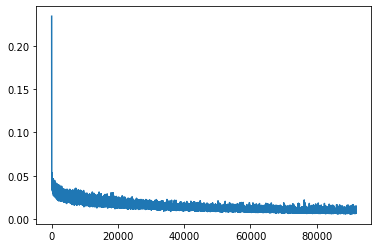

epoch: 50 	 step:0 	 loss: 0.007321
epoch: 50 	 step:100 	 loss: 0.007294
epoch: 50 	 step:200 	 loss: 0.006563
epoch: 50 	 step:300 	 loss: 0.007728
epoch: 50 	 step:400 	 loss: 0.006541
epoch: 50 	 step:500 	 loss: 0.006896
epoch: 50 	 step:600 	 loss: 0.006856
epoch: 50 	 step:700 	 loss: 0.007728
epoch: 50 	 step:800 	 loss: 0.00739
epoch: 50 	 step:900 	 loss: 0.00785
epoch: 50 	 step:1000 	 loss: 0.009009
epoch: 50 	 step:1100 	 loss: 0.008184
epoch: 50 	 step:1200 	 loss: 0.007977
epoch: 50 	 step:1300 	 loss: 0.007909
epoch: 50 	 step:1400 	 loss: 0.01014
epoch: 50 	 step:1500 	 loss: 0.00816
epoch: 50 	 step:1600 	 loss: 0.01204
epoch: 50 	 step:1700 	 loss: 0.007776
epoch: 50 	 step:1800 	 loss: 0.00813


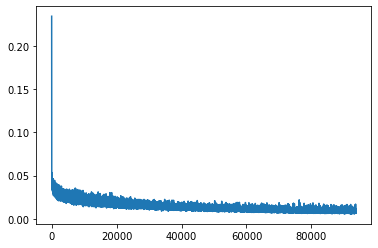

epoch: 51 	 step:0 	 loss: 0.006952
epoch: 51 	 step:100 	 loss: 0.007222
epoch: 51 	 step:200 	 loss: 0.007018
epoch: 51 	 step:300 	 loss: 0.008049
epoch: 51 	 step:400 	 loss: 0.006458
epoch: 51 	 step:500 	 loss: 0.007473
epoch: 51 	 step:600 	 loss: 0.006887
epoch: 51 	 step:700 	 loss: 0.00742
epoch: 51 	 step:800 	 loss: 0.008551
epoch: 51 	 step:900 	 loss: 0.008463
epoch: 51 	 step:1000 	 loss: 0.009305
epoch: 51 	 step:1100 	 loss: 0.009105
epoch: 51 	 step:1200 	 loss: 0.007132
epoch: 51 	 step:1300 	 loss: 0.007366
epoch: 51 	 step:1400 	 loss: 0.007276
epoch: 51 	 step:1500 	 loss: 0.007442
epoch: 51 	 step:1600 	 loss: 0.007482
epoch: 51 	 step:1700 	 loss: 0.008858
epoch: 51 	 step:1800 	 loss: 0.008092


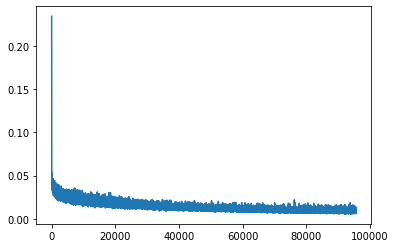

epoch: 52 	 step:0 	 loss: 0.006884
epoch: 52 	 step:100 	 loss: 0.007199
epoch: 52 	 step:200 	 loss: 0.007961
epoch: 52 	 step:300 	 loss: 0.007079
epoch: 52 	 step:400 	 loss: 0.007019
epoch: 52 	 step:500 	 loss: 0.007878
epoch: 52 	 step:600 	 loss: 0.006766
epoch: 52 	 step:700 	 loss: 0.006978
epoch: 52 	 step:800 	 loss: 0.008096
epoch: 52 	 step:900 	 loss: 0.006909
epoch: 52 	 step:1000 	 loss: 0.007094
epoch: 52 	 step:1100 	 loss: 0.007764
epoch: 52 	 step:1200 	 loss: 0.007468
epoch: 52 	 step:1300 	 loss: 0.006984
epoch: 52 	 step:1400 	 loss: 0.007698
epoch: 52 	 step:1500 	 loss: 0.006676
epoch: 52 	 step:1600 	 loss: 0.00819
epoch: 52 	 step:1700 	 loss: 0.007907
epoch: 52 	 step:1800 	 loss: 0.007665


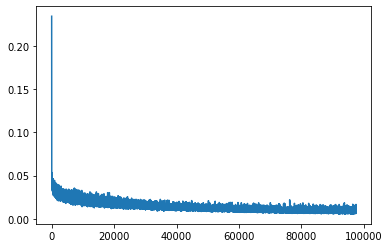

epoch: 53 	 step:0 	 loss: 0.008033
epoch: 53 	 step:100 	 loss: 0.006917
epoch: 53 	 step:200 	 loss: 0.007107
epoch: 53 	 step:300 	 loss: 0.0079
epoch: 53 	 step:400 	 loss: 0.007247
epoch: 53 	 step:500 	 loss: 0.006655
epoch: 53 	 step:600 	 loss: 0.006262
epoch: 53 	 step:700 	 loss: 0.007208
epoch: 53 	 step:800 	 loss: 0.007537
epoch: 53 	 step:900 	 loss: 0.01083
epoch: 53 	 step:1000 	 loss: 0.008666
epoch: 53 	 step:1100 	 loss: 0.006774
epoch: 53 	 step:1200 	 loss: 0.006394
epoch: 53 	 step:1300 	 loss: 0.0091
epoch: 53 	 step:1400 	 loss: 0.007792
epoch: 53 	 step:1500 	 loss: 0.009464
epoch: 53 	 step:1600 	 loss: 0.008516
epoch: 53 	 step:1700 	 loss: 0.007261
epoch: 53 	 step:1800 	 loss: 0.007205


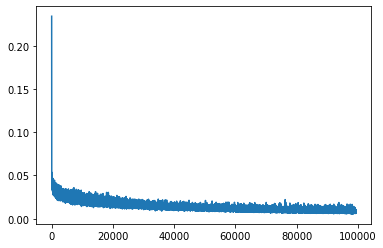

epoch: 54 	 step:0 	 loss: 0.006431
epoch: 54 	 step:100 	 loss: 0.006857
epoch: 54 	 step:200 	 loss: 0.006777
epoch: 54 	 step:300 	 loss: 0.006744
epoch: 54 	 step:400 	 loss: 0.006787
epoch: 54 	 step:500 	 loss: 0.007694
epoch: 54 	 step:600 	 loss: 0.006336
epoch: 54 	 step:700 	 loss: 0.008105
epoch: 54 	 step:800 	 loss: 0.007466
epoch: 54 	 step:900 	 loss: 0.007354
epoch: 54 	 step:1000 	 loss: 0.007123
epoch: 54 	 step:1100 	 loss: 0.006467
epoch: 54 	 step:1200 	 loss: 0.007018
epoch: 54 	 step:1300 	 loss: 0.006366
epoch: 54 	 step:1400 	 loss: 0.00767
epoch: 54 	 step:1500 	 loss: 0.006876
epoch: 54 	 step:1600 	 loss: 0.007423
epoch: 54 	 step:1700 	 loss: 0.007764
epoch: 54 	 step:1800 	 loss: 0.006674


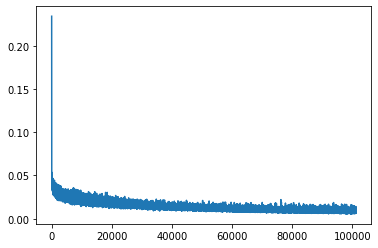

epoch: 55 	 step:0 	 loss: 0.00672
epoch: 55 	 step:100 	 loss: 0.007712
epoch: 55 	 step:200 	 loss: 0.008405
epoch: 55 	 step:300 	 loss: 0.007629
epoch: 55 	 step:400 	 loss: 0.006776
epoch: 55 	 step:500 	 loss: 0.006671
epoch: 55 	 step:600 	 loss: 0.00733
epoch: 55 	 step:700 	 loss: 0.007399
epoch: 55 	 step:800 	 loss: 0.007398
epoch: 55 	 step:900 	 loss: 0.007282
epoch: 55 	 step:1000 	 loss: 0.008083
epoch: 55 	 step:1100 	 loss: 0.008737
epoch: 55 	 step:1200 	 loss: 0.007083
epoch: 55 	 step:1300 	 loss: 0.007227
epoch: 55 	 step:1400 	 loss: 0.007245
epoch: 55 	 step:1500 	 loss: 0.007264
epoch: 55 	 step:1600 	 loss: 0.007371
epoch: 55 	 step:1700 	 loss: 0.007679
epoch: 55 	 step:1800 	 loss: 0.00732


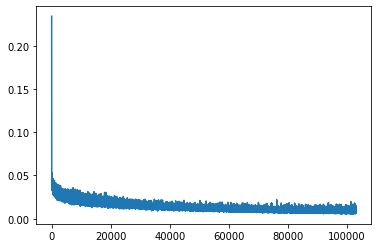

epoch: 56 	 step:0 	 loss: 0.006827
epoch: 56 	 step:100 	 loss: 0.006683
epoch: 56 	 step:200 	 loss: 0.006908
epoch: 56 	 step:300 	 loss: 0.006257
epoch: 56 	 step:400 	 loss: 0.00741
epoch: 56 	 step:500 	 loss: 0.006828
epoch: 56 	 step:600 	 loss: 0.006233
epoch: 56 	 step:700 	 loss: 0.007037
epoch: 56 	 step:800 	 loss: 0.006627
epoch: 56 	 step:900 	 loss: 0.01181
epoch: 56 	 step:1000 	 loss: 0.007071
epoch: 56 	 step:1100 	 loss: 0.007644
epoch: 56 	 step:1200 	 loss: 0.008094
epoch: 56 	 step:1300 	 loss: 0.006752
epoch: 56 	 step:1400 	 loss: 0.007387
epoch: 56 	 step:1500 	 loss: 0.007055
epoch: 56 	 step:1600 	 loss: 0.006953
epoch: 56 	 step:1700 	 loss: 0.006889
epoch: 56 	 step:1800 	 loss: 0.00744


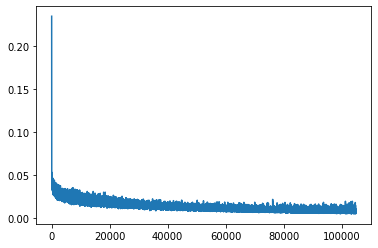

epoch: 57 	 step:0 	 loss: 0.006106
epoch: 57 	 step:100 	 loss: 0.006645
epoch: 57 	 step:200 	 loss: 0.005923
epoch: 57 	 step:300 	 loss: 0.006064
epoch: 57 	 step:400 	 loss: 0.007254
epoch: 57 	 step:500 	 loss: 0.006522
epoch: 57 	 step:600 	 loss: 0.007396
epoch: 57 	 step:700 	 loss: 0.007295
epoch: 57 	 step:800 	 loss: 0.007025
epoch: 57 	 step:900 	 loss: 0.008138
epoch: 57 	 step:1000 	 loss: 0.006424
epoch: 57 	 step:1100 	 loss: 0.006401
epoch: 57 	 step:1200 	 loss: 0.006729
epoch: 57 	 step:1300 	 loss: 0.007062
epoch: 57 	 step:1400 	 loss: 0.006253
epoch: 57 	 step:1500 	 loss: 0.008264
epoch: 57 	 step:1600 	 loss: 0.006221
epoch: 57 	 step:1700 	 loss: 0.006539
epoch: 57 	 step:1800 	 loss: 0.00729


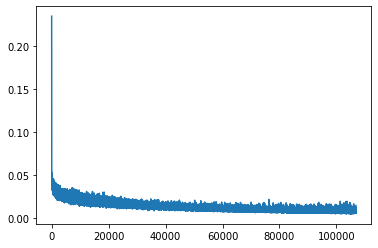

epoch: 58 	 step:0 	 loss: 0.006545
epoch: 58 	 step:100 	 loss: 0.005882
epoch: 58 	 step:200 	 loss: 0.006081
epoch: 58 	 step:300 	 loss: 0.006375
epoch: 58 	 step:400 	 loss: 0.007389
epoch: 58 	 step:500 	 loss: 0.007641
epoch: 58 	 step:600 	 loss: 0.006686
epoch: 58 	 step:700 	 loss: 0.006983
epoch: 58 	 step:800 	 loss: 0.006159
epoch: 58 	 step:900 	 loss: 0.00638
epoch: 58 	 step:1000 	 loss: 0.007334
epoch: 58 	 step:1100 	 loss: 0.006871
epoch: 58 	 step:1200 	 loss: 0.006675
epoch: 58 	 step:1300 	 loss: 0.007068
epoch: 58 	 step:1400 	 loss: 0.006779
epoch: 58 	 step:1500 	 loss: 0.007888
epoch: 58 	 step:1600 	 loss: 0.007727
epoch: 58 	 step:1700 	 loss: 0.007747
epoch: 58 	 step:1800 	 loss: 0.007076


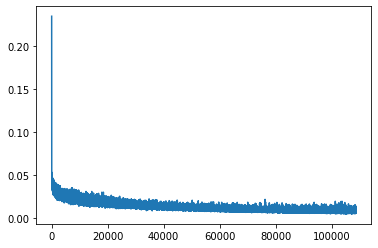

epoch: 59 	 step:0 	 loss: 0.006484
epoch: 59 	 step:100 	 loss: 0.006533
epoch: 59 	 step:200 	 loss: 0.008504
epoch: 59 	 step:300 	 loss: 0.006354
epoch: 59 	 step:400 	 loss: 0.006867
epoch: 59 	 step:500 	 loss: 0.005858
epoch: 59 	 step:600 	 loss: 0.006645
epoch: 59 	 step:700 	 loss: 0.006642
epoch: 59 	 step:800 	 loss: 0.007115
epoch: 59 	 step:900 	 loss: 0.006623
epoch: 59 	 step:1000 	 loss: 0.006866
epoch: 59 	 step:1100 	 loss: 0.007148
epoch: 59 	 step:1200 	 loss: 0.00727
epoch: 59 	 step:1300 	 loss: 0.008287
epoch: 59 	 step:1400 	 loss: 0.006544
epoch: 59 	 step:1500 	 loss: 0.007367
epoch: 59 	 step:1600 	 loss: 0.01061
epoch: 59 	 step:1700 	 loss: 0.006634
epoch: 59 	 step:1800 	 loss: 0.006409


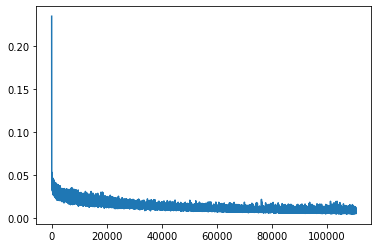

epoch: 60 	 step:0 	 loss: 0.006324
epoch: 60 	 step:100 	 loss: 0.006906
epoch: 60 	 step:200 	 loss: 0.005938
epoch: 60 	 step:300 	 loss: 0.006676
epoch: 60 	 step:400 	 loss: 0.006151
epoch: 60 	 step:500 	 loss: 0.006295
epoch: 60 	 step:600 	 loss: 0.006987
epoch: 60 	 step:700 	 loss: 0.006308
epoch: 60 	 step:800 	 loss: 0.00647
epoch: 60 	 step:900 	 loss: 0.006997
epoch: 60 	 step:1000 	 loss: 0.006392
epoch: 60 	 step:1100 	 loss: 0.007096
epoch: 60 	 step:1200 	 loss: 0.007002
epoch: 60 	 step:1300 	 loss: 0.007077
epoch: 60 	 step:1400 	 loss: 0.006537
epoch: 60 	 step:1500 	 loss: 0.007538
epoch: 60 	 step:1600 	 loss: 0.007701
epoch: 60 	 step:1700 	 loss: 0.007288
epoch: 60 	 step:1800 	 loss: 0.007021


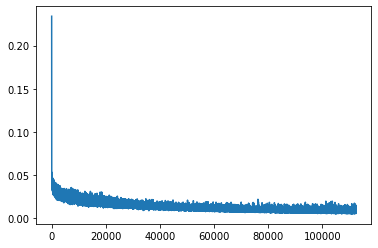

epoch: 61 	 step:0 	 loss: 0.01255
epoch: 61 	 step:100 	 loss: 0.006047
epoch: 61 	 step:200 	 loss: 0.007593
epoch: 61 	 step:300 	 loss: 0.007769
epoch: 61 	 step:400 	 loss: 0.006481
epoch: 61 	 step:500 	 loss: 0.006708
epoch: 61 	 step:600 	 loss: 0.006784
epoch: 61 	 step:700 	 loss: 0.006511
epoch: 61 	 step:800 	 loss: 0.006439
epoch: 61 	 step:900 	 loss: 0.006936
epoch: 61 	 step:1000 	 loss: 0.007644
epoch: 61 	 step:1100 	 loss: 0.006511
epoch: 61 	 step:1200 	 loss: 0.007105
epoch: 61 	 step:1300 	 loss: 0.005621
epoch: 61 	 step:1400 	 loss: 0.006391
epoch: 61 	 step:1500 	 loss: 0.006867
epoch: 61 	 step:1600 	 loss: 0.006912
epoch: 61 	 step:1700 	 loss: 0.006009
epoch: 61 	 step:1800 	 loss: 0.006193


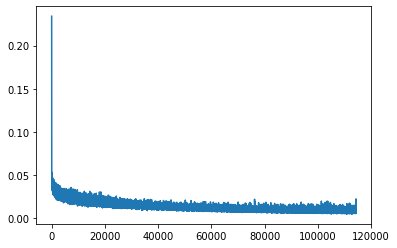

epoch: 62 	 step:0 	 loss: 0.005337
epoch: 62 	 step:100 	 loss: 0.006358
epoch: 62 	 step:200 	 loss: 0.006442
epoch: 62 	 step:300 	 loss: 0.00643
epoch: 62 	 step:400 	 loss: 0.00632
epoch: 62 	 step:500 	 loss: 0.006383
epoch: 62 	 step:600 	 loss: 0.006959
epoch: 62 	 step:700 	 loss: 0.006803
epoch: 62 	 step:800 	 loss: 0.006455
epoch: 62 	 step:900 	 loss: 0.006264
epoch: 62 	 step:1000 	 loss: 0.005981
epoch: 62 	 step:1100 	 loss: 0.006019
epoch: 62 	 step:1200 	 loss: 0.006612
epoch: 62 	 step:1300 	 loss: 0.00687
epoch: 62 	 step:1400 	 loss: 0.00996
epoch: 62 	 step:1500 	 loss: 0.008838
epoch: 62 	 step:1600 	 loss: 0.007141
epoch: 62 	 step:1700 	 loss: 0.006864
epoch: 62 	 step:1800 	 loss: 0.006347


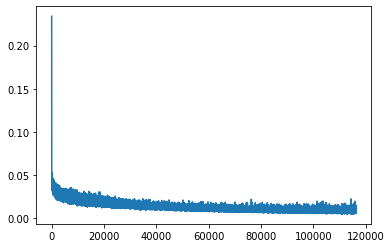

epoch: 63 	 step:0 	 loss: 0.007335
epoch: 63 	 step:100 	 loss: 0.008543
epoch: 63 	 step:200 	 loss: 0.007526
epoch: 63 	 step:300 	 loss: 0.005651
epoch: 63 	 step:400 	 loss: 0.005422
epoch: 63 	 step:500 	 loss: 0.006173
epoch: 63 	 step:600 	 loss: 0.005268
epoch: 63 	 step:700 	 loss: 0.006749
epoch: 63 	 step:800 	 loss: 0.007727
epoch: 63 	 step:900 	 loss: 0.006481
epoch: 63 	 step:1000 	 loss: 0.006994
epoch: 63 	 step:1100 	 loss: 0.006413
epoch: 63 	 step:1200 	 loss: 0.007428
epoch: 63 	 step:1300 	 loss: 0.006227
epoch: 63 	 step:1400 	 loss: 0.006482
epoch: 63 	 step:1500 	 loss: 0.007294
epoch: 63 	 step:1600 	 loss: 0.00624
epoch: 63 	 step:1700 	 loss: 0.007446
epoch: 63 	 step:1800 	 loss: 0.007473


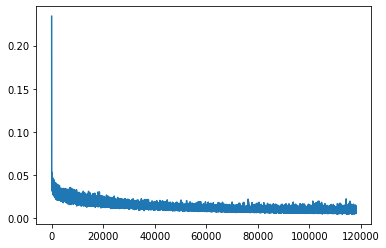

epoch: 64 	 step:0 	 loss: 0.005651
epoch: 64 	 step:100 	 loss: 0.005776
epoch: 64 	 step:200 	 loss: 0.005983
epoch: 64 	 step:300 	 loss: 0.00618
epoch: 64 	 step:400 	 loss: 0.006352
epoch: 64 	 step:500 	 loss: 0.006258
epoch: 64 	 step:600 	 loss: 0.009718
epoch: 64 	 step:700 	 loss: 0.006677
epoch: 64 	 step:800 	 loss: 0.006332
epoch: 64 	 step:900 	 loss: 0.006044
epoch: 64 	 step:1000 	 loss: 0.01047
epoch: 64 	 step:1100 	 loss: 0.006818
epoch: 64 	 step:1200 	 loss: 0.006524
epoch: 64 	 step:1300 	 loss: 0.006956
epoch: 64 	 step:1400 	 loss: 0.006483
epoch: 64 	 step:1500 	 loss: 0.007491
epoch: 64 	 step:1600 	 loss: 0.007435
epoch: 64 	 step:1700 	 loss: 0.006272
epoch: 64 	 step:1800 	 loss: 0.01096


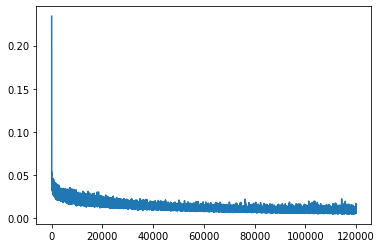

epoch: 65 	 step:0 	 loss: 0.006808
epoch: 65 	 step:100 	 loss: 0.006903
epoch: 65 	 step:200 	 loss: 0.006585
epoch: 65 	 step:300 	 loss: 0.006839
epoch: 65 	 step:400 	 loss: 0.006196
epoch: 65 	 step:500 	 loss: 0.005813
epoch: 65 	 step:600 	 loss: 0.006562
epoch: 65 	 step:700 	 loss: 0.006238
epoch: 65 	 step:800 	 loss: 0.006055
epoch: 65 	 step:900 	 loss: 0.007149
epoch: 65 	 step:1000 	 loss: 0.006404
epoch: 65 	 step:1100 	 loss: 0.007137
epoch: 65 	 step:1200 	 loss: 0.006286
epoch: 65 	 step:1300 	 loss: 0.006803
epoch: 65 	 step:1400 	 loss: 0.006487
epoch: 65 	 step:1500 	 loss: 0.007323
epoch: 65 	 step:1600 	 loss: 0.007697
epoch: 65 	 step:1700 	 loss: 0.006727
epoch: 65 	 step:1800 	 loss: 0.006966


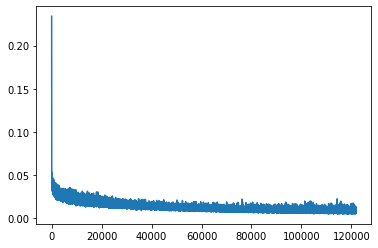

epoch: 66 	 step:0 	 loss: 0.005738
epoch: 66 	 step:100 	 loss: 0.005959
epoch: 66 	 step:200 	 loss: 0.006042
epoch: 66 	 step:300 	 loss: 0.005851
epoch: 66 	 step:400 	 loss: 0.006752
epoch: 66 	 step:500 	 loss: 0.006004
epoch: 66 	 step:600 	 loss: 0.006272
epoch: 66 	 step:700 	 loss: 0.005686
epoch: 66 	 step:800 	 loss: 0.007331
epoch: 66 	 step:900 	 loss: 0.007202
epoch: 66 	 step:1000 	 loss: 0.006407
epoch: 66 	 step:1100 	 loss: 0.005721
epoch: 66 	 step:1200 	 loss: 0.007683
epoch: 66 	 step:1300 	 loss: 0.005744
epoch: 66 	 step:1400 	 loss: 0.006449
epoch: 66 	 step:1500 	 loss: 0.006078
epoch: 66 	 step:1600 	 loss: 0.005909
epoch: 66 	 step:1700 	 loss: 0.00776
epoch: 66 	 step:1800 	 loss: 0.00692


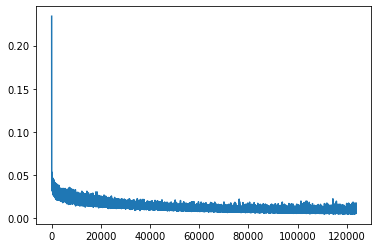

epoch: 67 	 step:0 	 loss: 0.006299
epoch: 67 	 step:100 	 loss: 0.007631
epoch: 67 	 step:200 	 loss: 0.006927
epoch: 67 	 step:300 	 loss: 0.00678
epoch: 67 	 step:400 	 loss: 0.006065
epoch: 67 	 step:500 	 loss: 0.006593
epoch: 67 	 step:600 	 loss: 0.006156
epoch: 67 	 step:700 	 loss: 0.006173
epoch: 67 	 step:800 	 loss: 0.00589
epoch: 67 	 step:900 	 loss: 0.006436
epoch: 67 	 step:1000 	 loss: 0.00948
epoch: 67 	 step:1100 	 loss: 0.006108
epoch: 67 	 step:1200 	 loss: 0.008524
epoch: 67 	 step:1300 	 loss: 0.005736
epoch: 67 	 step:1400 	 loss: 0.006317
epoch: 67 	 step:1500 	 loss: 0.006295
epoch: 67 	 step:1600 	 loss: 0.00645
epoch: 67 	 step:1700 	 loss: 0.006424
epoch: 67 	 step:1800 	 loss: 0.007607


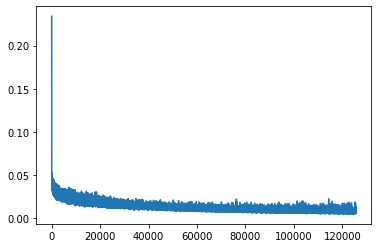

epoch: 68 	 step:0 	 loss: 0.006127
epoch: 68 	 step:100 	 loss: 0.006001
epoch: 68 	 step:200 	 loss: 0.005663
epoch: 68 	 step:300 	 loss: 0.007004
epoch: 68 	 step:400 	 loss: 0.006623
epoch: 68 	 step:500 	 loss: 0.00654
epoch: 68 	 step:600 	 loss: 0.006191
epoch: 68 	 step:700 	 loss: 0.0068
epoch: 68 	 step:800 	 loss: 0.007035
epoch: 68 	 step:900 	 loss: 0.005917
epoch: 68 	 step:1000 	 loss: 0.006558
epoch: 68 	 step:1100 	 loss: 0.00572
epoch: 68 	 step:1200 	 loss: 0.006829
epoch: 68 	 step:1300 	 loss: 0.006299
epoch: 68 	 step:1400 	 loss: 0.006174
epoch: 68 	 step:1500 	 loss: 0.006113
epoch: 68 	 step:1600 	 loss: 0.007163
epoch: 68 	 step:1700 	 loss: 0.006563
epoch: 68 	 step:1800 	 loss: 0.00657


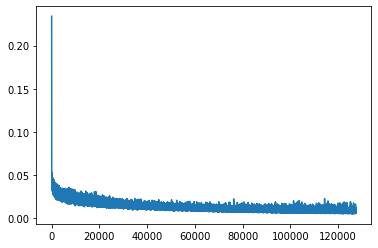

epoch: 69 	 step:0 	 loss: 0.006526
epoch: 69 	 step:100 	 loss: 0.00587
epoch: 69 	 step:200 	 loss: 0.005465
epoch: 69 	 step:300 	 loss: 0.008226
epoch: 69 	 step:400 	 loss: 0.006466
epoch: 69 	 step:500 	 loss: 0.006334
epoch: 69 	 step:600 	 loss: 0.006509
epoch: 69 	 step:700 	 loss: 0.005583
epoch: 69 	 step:800 	 loss: 0.007123
epoch: 69 	 step:900 	 loss: 0.005161
epoch: 69 	 step:1000 	 loss: 0.005893
epoch: 69 	 step:1100 	 loss: 0.006736
epoch: 69 	 step:1200 	 loss: 0.006212
epoch: 69 	 step:1300 	 loss: 0.006719
epoch: 69 	 step:1400 	 loss: 0.006348
epoch: 69 	 step:1500 	 loss: 0.006494
epoch: 69 	 step:1600 	 loss: 0.00558
epoch: 69 	 step:1700 	 loss: 0.005672
epoch: 69 	 step:1800 	 loss: 0.006119


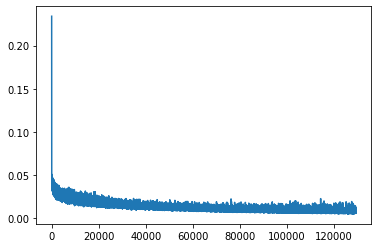

epoch: 70 	 step:0 	 loss: 0.006005
epoch: 70 	 step:100 	 loss: 0.006012
epoch: 70 	 step:200 	 loss: 0.006045
epoch: 70 	 step:300 	 loss: 0.006838
epoch: 70 	 step:400 	 loss: 0.005179
epoch: 70 	 step:500 	 loss: 0.00617
epoch: 70 	 step:600 	 loss: 0.006351
epoch: 70 	 step:700 	 loss: 0.00714
epoch: 70 	 step:800 	 loss: 0.006465
epoch: 70 	 step:900 	 loss: 0.005622
epoch: 70 	 step:1000 	 loss: 0.006303
epoch: 70 	 step:1100 	 loss: 0.006821
epoch: 70 	 step:1200 	 loss: 0.006059
epoch: 70 	 step:1300 	 loss: 0.005799
epoch: 70 	 step:1400 	 loss: 0.006086
epoch: 70 	 step:1500 	 loss: 0.006816
epoch: 70 	 step:1600 	 loss: 0.00711
epoch: 70 	 step:1700 	 loss: 0.007283
epoch: 70 	 step:1800 	 loss: 0.00636


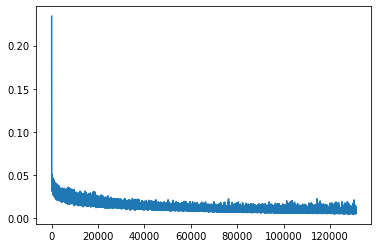

epoch: 71 	 step:0 	 loss: 0.005964
epoch: 71 	 step:100 	 loss: 0.006804
epoch: 71 	 step:200 	 loss: 0.007029
epoch: 71 	 step:300 	 loss: 0.00768
epoch: 71 	 step:400 	 loss: 0.006216
epoch: 71 	 step:500 	 loss: 0.00606
epoch: 71 	 step:600 	 loss: 0.005323
epoch: 71 	 step:700 	 loss: 0.005412
epoch: 71 	 step:800 	 loss: 0.005881
epoch: 71 	 step:900 	 loss: 0.006512
epoch: 71 	 step:1000 	 loss: 0.006731
epoch: 71 	 step:1100 	 loss: 0.006455
epoch: 71 	 step:1200 	 loss: 0.005477
epoch: 71 	 step:1300 	 loss: 0.005985
epoch: 71 	 step:1400 	 loss: 0.006756
epoch: 71 	 step:1500 	 loss: 0.006362
epoch: 71 	 step:1600 	 loss: 0.006434
epoch: 71 	 step:1700 	 loss: 0.006571
epoch: 71 	 step:1800 	 loss: 0.006667


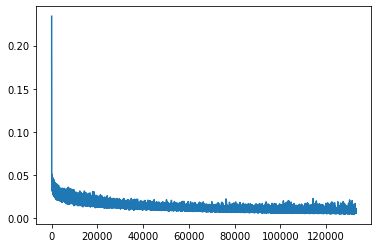

epoch: 72 	 step:0 	 loss: 0.006146
epoch: 72 	 step:100 	 loss: 0.005643
epoch: 72 	 step:200 	 loss: 0.006193
epoch: 72 	 step:300 	 loss: 0.006413
epoch: 72 	 step:400 	 loss: 0.006773
epoch: 72 	 step:500 	 loss: 0.005742
epoch: 72 	 step:600 	 loss: 0.005973
epoch: 72 	 step:700 	 loss: 0.006103
epoch: 72 	 step:800 	 loss: 0.006172
epoch: 72 	 step:900 	 loss: 0.01008
epoch: 72 	 step:1000 	 loss: 0.00603
epoch: 72 	 step:1100 	 loss: 0.006428
epoch: 72 	 step:1200 	 loss: 0.005744
epoch: 72 	 step:1300 	 loss: 0.005916
epoch: 72 	 step:1400 	 loss: 0.005586
epoch: 72 	 step:1500 	 loss: 0.006174
epoch: 72 	 step:1600 	 loss: 0.005951
epoch: 72 	 step:1700 	 loss: 0.006811
epoch: 72 	 step:1800 	 loss: 0.006368


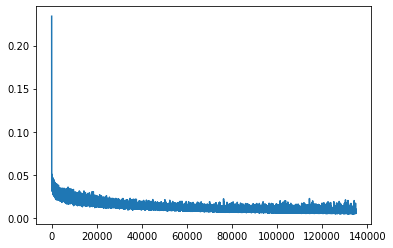

epoch: 73 	 step:0 	 loss: 0.005846
epoch: 73 	 step:100 	 loss: 0.006513
epoch: 73 	 step:200 	 loss: 0.005685
epoch: 73 	 step:300 	 loss: 0.006198
epoch: 73 	 step:400 	 loss: 0.009595
epoch: 73 	 step:500 	 loss: 0.006008
epoch: 73 	 step:600 	 loss: 0.006189
epoch: 73 	 step:700 	 loss: 0.005955
epoch: 73 	 step:800 	 loss: 0.005569
epoch: 73 	 step:900 	 loss: 0.005828
epoch: 73 	 step:1000 	 loss: 0.00928
epoch: 73 	 step:1100 	 loss: 0.006328
epoch: 73 	 step:1200 	 loss: 0.01352
epoch: 73 	 step:1300 	 loss: 0.005667
epoch: 73 	 step:1400 	 loss: 0.005666
epoch: 73 	 step:1500 	 loss: 0.005508
epoch: 73 	 step:1600 	 loss: 0.006348
epoch: 73 	 step:1700 	 loss: 0.005391
epoch: 73 	 step:1800 	 loss: 0.006796


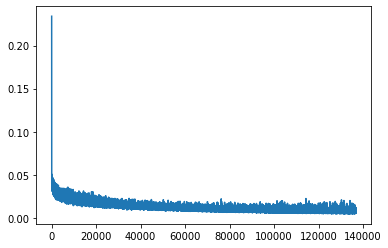

epoch: 74 	 step:0 	 loss: 0.006251
epoch: 74 	 step:100 	 loss: 0.006335
epoch: 74 	 step:200 	 loss: 0.005971
epoch: 74 	 step:300 	 loss: 0.005385
epoch: 74 	 step:400 	 loss: 0.005989
epoch: 74 	 step:500 	 loss: 0.006163
epoch: 74 	 step:600 	 loss: 0.006117
epoch: 74 	 step:700 	 loss: 0.006645
epoch: 74 	 step:800 	 loss: 0.01022
epoch: 74 	 step:900 	 loss: 0.006471
epoch: 74 	 step:1000 	 loss: 0.006057
epoch: 74 	 step:1100 	 loss: 0.006512
epoch: 74 	 step:1200 	 loss: 0.006371
epoch: 74 	 step:1300 	 loss: 0.006957
epoch: 74 	 step:1400 	 loss: 0.005835
epoch: 74 	 step:1500 	 loss: 0.006669
epoch: 74 	 step:1600 	 loss: 0.006254
epoch: 74 	 step:1700 	 loss: 0.005789
epoch: 74 	 step:1800 	 loss: 0.006523


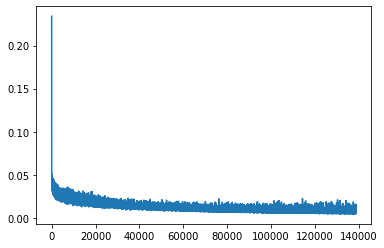

epoch: 75 	 step:0 	 loss: 0.01032
epoch: 75 	 step:100 	 loss: 0.006815
epoch: 75 	 step:200 	 loss: 0.006046
epoch: 75 	 step:300 	 loss: 0.005454
epoch: 75 	 step:400 	 loss: 0.005649
epoch: 75 	 step:500 	 loss: 0.0051
epoch: 75 	 step:600 	 loss: 0.005929
epoch: 75 	 step:700 	 loss: 0.006972
epoch: 75 	 step:800 	 loss: 0.006824
epoch: 75 	 step:900 	 loss: 0.007543
epoch: 75 	 step:1000 	 loss: 0.006666
epoch: 75 	 step:1100 	 loss: 0.005898
epoch: 75 	 step:1200 	 loss: 0.005605
epoch: 75 	 step:1300 	 loss: 0.006545
epoch: 75 	 step:1400 	 loss: 0.006951
epoch: 75 	 step:1500 	 loss: 0.005936
epoch: 75 	 step:1600 	 loss: 0.005639
epoch: 75 	 step:1700 	 loss: 0.006205
epoch: 75 	 step:1800 	 loss: 0.005502


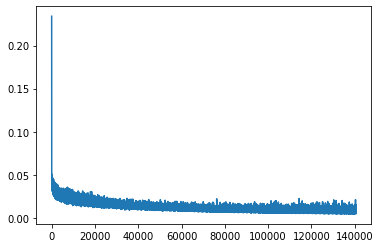

epoch: 76 	 step:0 	 loss: 0.006677
epoch: 76 	 step:100 	 loss: 0.006281
epoch: 76 	 step:200 	 loss: 0.005008
epoch: 76 	 step:300 	 loss: 0.007258
epoch: 76 	 step:400 	 loss: 0.005441
epoch: 76 	 step:500 	 loss: 0.005394
epoch: 76 	 step:600 	 loss: 0.006011
epoch: 76 	 step:700 	 loss: 0.01004
epoch: 76 	 step:800 	 loss: 0.006397
epoch: 76 	 step:900 	 loss: 0.006624
epoch: 76 	 step:1000 	 loss: 0.006046
epoch: 76 	 step:1100 	 loss: 0.005477
epoch: 76 	 step:1200 	 loss: 0.005372
epoch: 76 	 step:1300 	 loss: 0.007098
epoch: 76 	 step:1400 	 loss: 0.005363
epoch: 76 	 step:1500 	 loss: 0.005735
epoch: 76 	 step:1600 	 loss: 0.006989
epoch: 76 	 step:1700 	 loss: 0.006196
epoch: 76 	 step:1800 	 loss: 0.008908


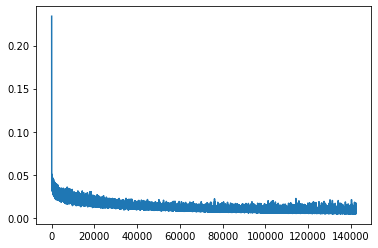

epoch: 77 	 step:0 	 loss: 0.005321
epoch: 77 	 step:100 	 loss: 0.006093
epoch: 77 	 step:200 	 loss: 0.00515
epoch: 77 	 step:300 	 loss: 0.005893
epoch: 77 	 step:400 	 loss: 0.00588
epoch: 77 	 step:500 	 loss: 0.005056
epoch: 77 	 step:600 	 loss: 0.005794
epoch: 77 	 step:700 	 loss: 0.005731
epoch: 77 	 step:800 	 loss: 0.006019
epoch: 77 	 step:900 	 loss: 0.005826
epoch: 77 	 step:1000 	 loss: 0.006036
epoch: 77 	 step:1100 	 loss: 0.005741
epoch: 77 	 step:1200 	 loss: 0.005803
epoch: 77 	 step:1300 	 loss: 0.005743
epoch: 77 	 step:1400 	 loss: 0.006164
epoch: 77 	 step:1500 	 loss: 0.006379
epoch: 77 	 step:1600 	 loss: 0.005521
epoch: 77 	 step:1700 	 loss: 0.006219
epoch: 77 	 step:1800 	 loss: 0.005917


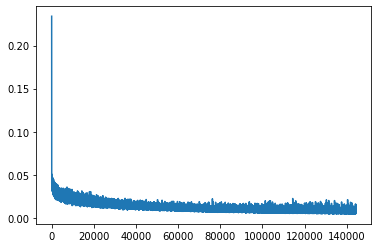

epoch: 78 	 step:0 	 loss: 0.006215
epoch: 78 	 step:100 	 loss: 0.005371
epoch: 78 	 step:200 	 loss: 0.005637
epoch: 78 	 step:300 	 loss: 0.005507
epoch: 78 	 step:400 	 loss: 0.005432
epoch: 78 	 step:500 	 loss: 0.005901
epoch: 78 	 step:600 	 loss: 0.005746
epoch: 78 	 step:700 	 loss: 0.005002
epoch: 78 	 step:800 	 loss: 0.005791
epoch: 78 	 step:900 	 loss: 0.006528
epoch: 78 	 step:1000 	 loss: 0.006182
epoch: 78 	 step:1100 	 loss: 0.005726
epoch: 78 	 step:1200 	 loss: 0.006098
epoch: 78 	 step:1300 	 loss: 0.005261
epoch: 78 	 step:1400 	 loss: 0.00576
epoch: 78 	 step:1500 	 loss: 0.006569
epoch: 78 	 step:1600 	 loss: 0.006206
epoch: 78 	 step:1700 	 loss: 0.005542
epoch: 78 	 step:1800 	 loss: 0.005871


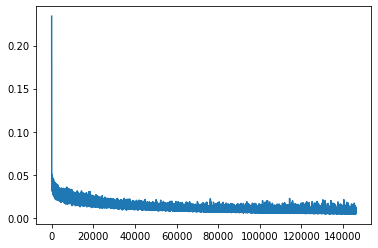

epoch: 79 	 step:0 	 loss: 0.005479
epoch: 79 	 step:100 	 loss: 0.005594
epoch: 79 	 step:200 	 loss: 0.005948
epoch: 79 	 step:300 	 loss: 0.006334
epoch: 79 	 step:400 	 loss: 0.005414
epoch: 79 	 step:500 	 loss: 0.006273
epoch: 79 	 step:600 	 loss: 0.006794
epoch: 79 	 step:700 	 loss: 0.006419
epoch: 79 	 step:800 	 loss: 0.005989
epoch: 79 	 step:900 	 loss: 0.004738
epoch: 79 	 step:1000 	 loss: 0.005358
epoch: 79 	 step:1100 	 loss: 0.005355
epoch: 79 	 step:1200 	 loss: 0.01519
epoch: 79 	 step:1300 	 loss: 0.005724
epoch: 79 	 step:1400 	 loss: 0.006058
epoch: 79 	 step:1500 	 loss: 0.005598
epoch: 79 	 step:1600 	 loss: 0.005716
epoch: 79 	 step:1700 	 loss: 0.0055
epoch: 79 	 step:1800 	 loss: 0.005824


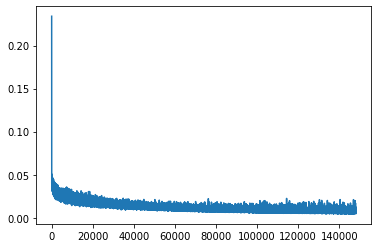

epoch: 80 	 step:0 	 loss: 0.005462
epoch: 80 	 step:100 	 loss: 0.00544
epoch: 80 	 step:200 	 loss: 0.005353
epoch: 80 	 step:300 	 loss: 0.005332
epoch: 80 	 step:400 	 loss: 0.005561
epoch: 80 	 step:500 	 loss: 0.006736
epoch: 80 	 step:600 	 loss: 0.005566
epoch: 80 	 step:700 	 loss: 0.005691
epoch: 80 	 step:800 	 loss: 0.006462
epoch: 80 	 step:900 	 loss: 0.0061
epoch: 80 	 step:1000 	 loss: 0.006495
epoch: 80 	 step:1100 	 loss: 0.005944
epoch: 80 	 step:1200 	 loss: 0.005969
epoch: 80 	 step:1300 	 loss: 0.006276
epoch: 80 	 step:1400 	 loss: 0.005767
epoch: 80 	 step:1500 	 loss: 0.005536
epoch: 80 	 step:1600 	 loss: 0.005667
epoch: 80 	 step:1700 	 loss: 0.006048
epoch: 80 	 step:1800 	 loss: 0.005532


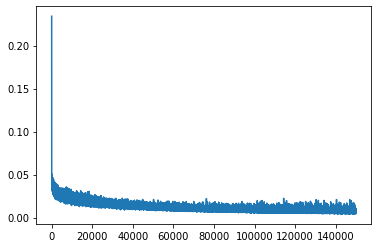

epoch: 81 	 step:0 	 loss: 0.005098
epoch: 81 	 step:100 	 loss: 0.005995
epoch: 81 	 step:200 	 loss: 0.0058
epoch: 81 	 step:300 	 loss: 0.004936
epoch: 81 	 step:400 	 loss: 0.005129
epoch: 81 	 step:500 	 loss: 0.004491
epoch: 81 	 step:600 	 loss: 0.00618
epoch: 81 	 step:700 	 loss: 0.005763
epoch: 81 	 step:800 	 loss: 0.006678
epoch: 81 	 step:900 	 loss: 0.005641
epoch: 81 	 step:1000 	 loss: 0.005383
epoch: 81 	 step:1100 	 loss: 0.005618
epoch: 81 	 step:1200 	 loss: 0.005861
epoch: 81 	 step:1300 	 loss: 0.006453
epoch: 81 	 step:1400 	 loss: 0.005229
epoch: 81 	 step:1500 	 loss: 0.008187
epoch: 81 	 step:1600 	 loss: 0.00567
epoch: 81 	 step:1700 	 loss: 0.006031
epoch: 81 	 step:1800 	 loss: 0.005881


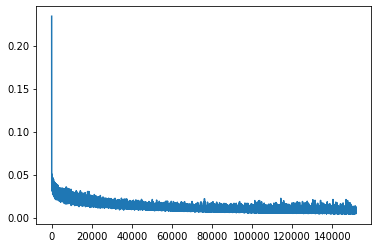

epoch: 82 	 step:0 	 loss: 0.006128
epoch: 82 	 step:100 	 loss: 0.004666
epoch: 82 	 step:200 	 loss: 0.005442
epoch: 82 	 step:300 	 loss: 0.004896
epoch: 82 	 step:400 	 loss: 0.005411
epoch: 82 	 step:500 	 loss: 0.004602
epoch: 82 	 step:600 	 loss: 0.006393
epoch: 82 	 step:700 	 loss: 0.00519
epoch: 82 	 step:800 	 loss: 0.005511
epoch: 82 	 step:900 	 loss: 0.005664
epoch: 82 	 step:1000 	 loss: 0.005956
epoch: 82 	 step:1100 	 loss: 0.006025
epoch: 82 	 step:1200 	 loss: 0.005848
epoch: 82 	 step:1300 	 loss: 0.005413
epoch: 82 	 step:1400 	 loss: 0.005922
epoch: 82 	 step:1500 	 loss: 0.005795
epoch: 82 	 step:1600 	 loss: 0.006121
epoch: 82 	 step:1700 	 loss: 0.005685
epoch: 82 	 step:1800 	 loss: 0.005457


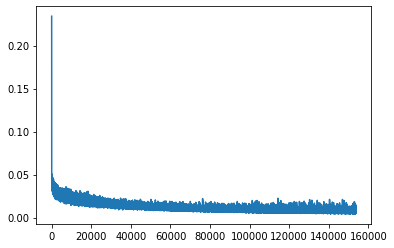

epoch: 83 	 step:0 	 loss: 0.005115
epoch: 83 	 step:100 	 loss: 0.004684
epoch: 83 	 step:200 	 loss: 0.005192
epoch: 83 	 step:300 	 loss: 0.005481
epoch: 83 	 step:400 	 loss: 0.005303
epoch: 83 	 step:500 	 loss: 0.005643
epoch: 83 	 step:600 	 loss: 0.005492
epoch: 83 	 step:700 	 loss: 0.006145
epoch: 83 	 step:800 	 loss: 0.005584
epoch: 83 	 step:900 	 loss: 0.00496
epoch: 83 	 step:1000 	 loss: 0.005638
epoch: 83 	 step:1100 	 loss: 0.005499
epoch: 83 	 step:1200 	 loss: 0.005541
epoch: 83 	 step:1300 	 loss: 0.007087
epoch: 83 	 step:1400 	 loss: 0.005459
epoch: 83 	 step:1500 	 loss: 0.005614
epoch: 83 	 step:1600 	 loss: 0.006379
epoch: 83 	 step:1700 	 loss: 0.006407
epoch: 83 	 step:1800 	 loss: 0.006118


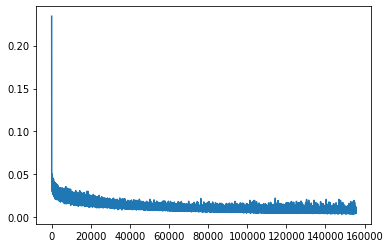

epoch: 84 	 step:0 	 loss: 0.005638
epoch: 84 	 step:100 	 loss: 0.006788
epoch: 84 	 step:200 	 loss: 0.004807
epoch: 84 	 step:300 	 loss: 0.005113
epoch: 84 	 step:400 	 loss: 0.005094
epoch: 84 	 step:500 	 loss: 0.00552
epoch: 84 	 step:600 	 loss: 0.005538
epoch: 84 	 step:700 	 loss: 0.005132
epoch: 84 	 step:800 	 loss: 0.00526
epoch: 84 	 step:900 	 loss: 0.005332
epoch: 84 	 step:1000 	 loss: 0.005279
epoch: 84 	 step:1100 	 loss: 0.00589
epoch: 84 	 step:1200 	 loss: 0.005492
epoch: 84 	 step:1300 	 loss: 0.006222
epoch: 84 	 step:1400 	 loss: 0.005415
epoch: 84 	 step:1500 	 loss: 0.006316
epoch: 84 	 step:1600 	 loss: 0.005826
epoch: 84 	 step:1700 	 loss: 0.005134
epoch: 84 	 step:1800 	 loss: 0.008869


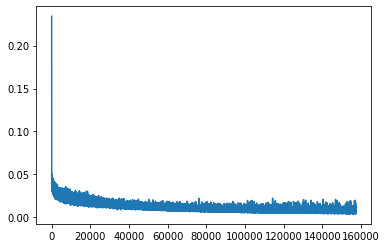

epoch: 85 	 step:0 	 loss: 0.005546
epoch: 85 	 step:100 	 loss: 0.00537
epoch: 85 	 step:200 	 loss: 0.005601
epoch: 85 	 step:300 	 loss: 0.005129
epoch: 85 	 step:400 	 loss: 0.005137
epoch: 85 	 step:500 	 loss: 0.007542
epoch: 85 	 step:600 	 loss: 0.004928
epoch: 85 	 step:700 	 loss: 0.005671
epoch: 85 	 step:800 	 loss: 0.005155
epoch: 85 	 step:900 	 loss: 0.006061
epoch: 85 	 step:1000 	 loss: 0.005079
epoch: 85 	 step:1100 	 loss: 0.006294
epoch: 85 	 step:1200 	 loss: 0.005603
epoch: 85 	 step:1300 	 loss: 0.005961
epoch: 85 	 step:1400 	 loss: 0.005447
epoch: 85 	 step:1500 	 loss: 0.005196
epoch: 85 	 step:1600 	 loss: 0.00646
epoch: 85 	 step:1700 	 loss: 0.005023
epoch: 85 	 step:1800 	 loss: 0.005686


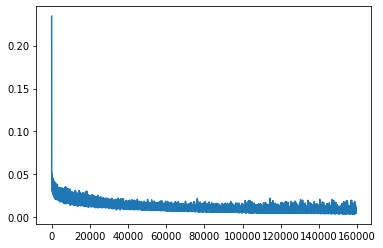

epoch: 86 	 step:0 	 loss: 0.007254
epoch: 86 	 step:100 	 loss: 0.01176
epoch: 86 	 step:200 	 loss: 0.006391
epoch: 86 	 step:300 	 loss: 0.005119
epoch: 86 	 step:400 	 loss: 0.005441
epoch: 86 	 step:500 	 loss: 0.006149
epoch: 86 	 step:600 	 loss: 0.005486
epoch: 86 	 step:700 	 loss: 0.004988
epoch: 86 	 step:800 	 loss: 0.005357
epoch: 86 	 step:900 	 loss: 0.005419
epoch: 86 	 step:1000 	 loss: 0.004798
epoch: 86 	 step:1100 	 loss: 0.005839
epoch: 86 	 step:1200 	 loss: 0.005886
epoch: 86 	 step:1300 	 loss: 0.005566
epoch: 86 	 step:1400 	 loss: 0.006071
epoch: 86 	 step:1500 	 loss: 0.005896
epoch: 86 	 step:1600 	 loss: 0.005672
epoch: 86 	 step:1700 	 loss: 0.00607
epoch: 86 	 step:1800 	 loss: 0.007539


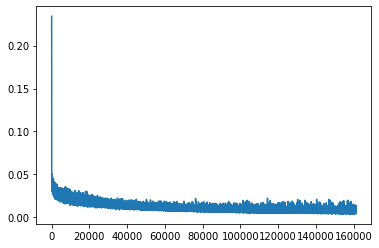

epoch: 87 	 step:0 	 loss: 0.00502
epoch: 87 	 step:100 	 loss: 0.007145
epoch: 87 	 step:200 	 loss: 0.006318
epoch: 87 	 step:300 	 loss: 0.005144
epoch: 87 	 step:400 	 loss: 0.006001
epoch: 87 	 step:500 	 loss: 0.004824
epoch: 87 	 step:600 	 loss: 0.005397
epoch: 87 	 step:700 	 loss: 0.005692
epoch: 87 	 step:800 	 loss: 0.00509
epoch: 87 	 step:900 	 loss: 0.0053
epoch: 87 	 step:1000 	 loss: 0.00539
epoch: 87 	 step:1100 	 loss: 0.006166
epoch: 87 	 step:1200 	 loss: 0.006087
epoch: 87 	 step:1300 	 loss: 0.00529
epoch: 87 	 step:1400 	 loss: 0.005054
epoch: 87 	 step:1500 	 loss: 0.005696
epoch: 87 	 step:1600 	 loss: 0.005655
epoch: 87 	 step:1700 	 loss: 0.0058
epoch: 87 	 step:1800 	 loss: 0.00579


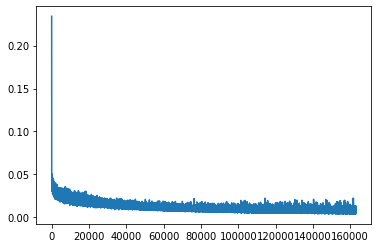

epoch: 88 	 step:0 	 loss: 0.004625
epoch: 88 	 step:100 	 loss: 0.005163
epoch: 88 	 step:200 	 loss: 0.005684
epoch: 88 	 step:300 	 loss: 0.005394
epoch: 88 	 step:400 	 loss: 0.005077
epoch: 88 	 step:500 	 loss: 0.00584
epoch: 88 	 step:600 	 loss: 0.004877
epoch: 88 	 step:700 	 loss: 0.004852
epoch: 88 	 step:800 	 loss: 0.004987
epoch: 88 	 step:900 	 loss: 0.005603
epoch: 88 	 step:1000 	 loss: 0.009879
epoch: 88 	 step:1100 	 loss: 0.005443
epoch: 88 	 step:1200 	 loss: 0.005684
epoch: 88 	 step:1300 	 loss: 0.005276
epoch: 88 	 step:1400 	 loss: 0.005236
epoch: 88 	 step:1500 	 loss: 0.01111
epoch: 88 	 step:1600 	 loss: 0.00631
epoch: 88 	 step:1700 	 loss: 0.006117
epoch: 88 	 step:1800 	 loss: 0.0055


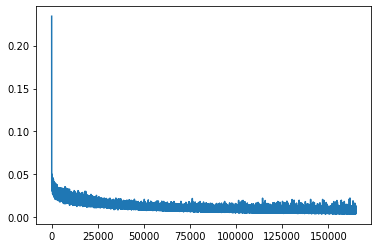

epoch: 89 	 step:0 	 loss: 0.004743
epoch: 89 	 step:100 	 loss: 0.005187
epoch: 89 	 step:200 	 loss: 0.005385
epoch: 89 	 step:300 	 loss: 0.005662
epoch: 89 	 step:400 	 loss: 0.005654
epoch: 89 	 step:500 	 loss: 0.005107
epoch: 89 	 step:600 	 loss: 0.005186
epoch: 89 	 step:700 	 loss: 0.005665
epoch: 89 	 step:800 	 loss: 0.004878
epoch: 89 	 step:900 	 loss: 0.005653
epoch: 89 	 step:1000 	 loss: 0.004888
epoch: 89 	 step:1100 	 loss: 0.005141
epoch: 89 	 step:1200 	 loss: 0.005059
epoch: 89 	 step:1300 	 loss: 0.005576
epoch: 89 	 step:1400 	 loss: 0.006145
epoch: 89 	 step:1500 	 loss: 0.007432
epoch: 89 	 step:1600 	 loss: 0.005048
epoch: 89 	 step:1700 	 loss: 0.005695
epoch: 89 	 step:1800 	 loss: 0.005982


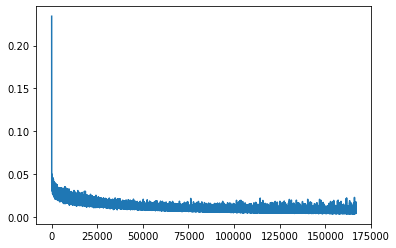

epoch: 90 	 step:0 	 loss: 0.006532
epoch: 90 	 step:100 	 loss: 0.004957
epoch: 90 	 step:200 	 loss: 0.0053
epoch: 90 	 step:300 	 loss: 0.007071
epoch: 90 	 step:400 	 loss: 0.005571
epoch: 90 	 step:500 	 loss: 0.005038
epoch: 90 	 step:600 	 loss: 0.005849
epoch: 90 	 step:700 	 loss: 0.006121
epoch: 90 	 step:800 	 loss: 0.005026
epoch: 90 	 step:900 	 loss: 0.00581
epoch: 90 	 step:1000 	 loss: 0.005628
epoch: 90 	 step:1100 	 loss: 0.005268
epoch: 90 	 step:1200 	 loss: 0.004886
epoch: 90 	 step:1300 	 loss: 0.005072
epoch: 90 	 step:1400 	 loss: 0.00563
epoch: 90 	 step:1500 	 loss: 0.006805
epoch: 90 	 step:1600 	 loss: 0.004995
epoch: 90 	 step:1700 	 loss: 0.00591
epoch: 90 	 step:1800 	 loss: 0.006571


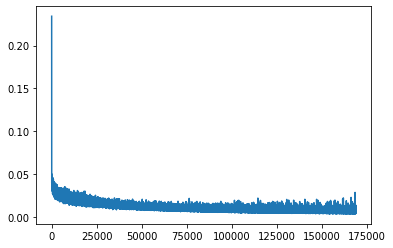

epoch: 91 	 step:0 	 loss: 0.00511
epoch: 91 	 step:100 	 loss: 0.005111
epoch: 91 	 step:200 	 loss: 0.006227
epoch: 91 	 step:300 	 loss: 0.004822
epoch: 91 	 step:400 	 loss: 0.004783
epoch: 91 	 step:500 	 loss: 0.006785
epoch: 91 	 step:600 	 loss: 0.005766
epoch: 91 	 step:700 	 loss: 0.004987
epoch: 91 	 step:800 	 loss: 0.009723
epoch: 91 	 step:900 	 loss: 0.004892
epoch: 91 	 step:1000 	 loss: 0.004865
epoch: 91 	 step:1100 	 loss: 0.005155
epoch: 91 	 step:1200 	 loss: 0.005217
epoch: 91 	 step:1300 	 loss: 0.006131
epoch: 91 	 step:1400 	 loss: 0.005862
epoch: 91 	 step:1500 	 loss: 0.007099
epoch: 91 	 step:1600 	 loss: 0.004738
epoch: 91 	 step:1700 	 loss: 0.006242
epoch: 91 	 step:1800 	 loss: 0.005892


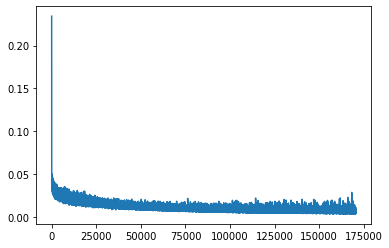

epoch: 92 	 step:0 	 loss: 0.004569
epoch: 92 	 step:100 	 loss: 0.005348
epoch: 92 	 step:200 	 loss: 0.00503
epoch: 92 	 step:300 	 loss: 0.005534
epoch: 92 	 step:400 	 loss: 0.005789
epoch: 92 	 step:500 	 loss: 0.004805
epoch: 92 	 step:600 	 loss: 0.005231
epoch: 92 	 step:700 	 loss: 0.005401
epoch: 92 	 step:800 	 loss: 0.005081
epoch: 92 	 step:900 	 loss: 0.005466
epoch: 92 	 step:1000 	 loss: 0.00506
epoch: 92 	 step:1100 	 loss: 0.007112
epoch: 92 	 step:1200 	 loss: 0.005719
epoch: 92 	 step:1300 	 loss: 0.005779
epoch: 92 	 step:1400 	 loss: 0.005761
epoch: 92 	 step:1500 	 loss: 0.004993
epoch: 92 	 step:1600 	 loss: 0.005554
epoch: 92 	 step:1700 	 loss: 0.00526
epoch: 92 	 step:1800 	 loss: 0.005047


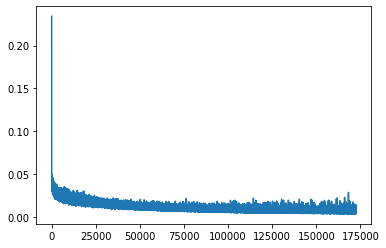

epoch: 93 	 step:0 	 loss: 0.005603
epoch: 93 	 step:100 	 loss: 0.00463
epoch: 93 	 step:200 	 loss: 0.005451
epoch: 93 	 step:300 	 loss: 0.004466
epoch: 93 	 step:400 	 loss: 0.0055
epoch: 93 	 step:500 	 loss: 0.005108
epoch: 93 	 step:600 	 loss: 0.005156
epoch: 93 	 step:700 	 loss: 0.005146
epoch: 93 	 step:800 	 loss: 0.005203
epoch: 93 	 step:900 	 loss: 0.005034
epoch: 93 	 step:1000 	 loss: 0.005476
epoch: 93 	 step:1100 	 loss: 0.004706
epoch: 93 	 step:1200 	 loss: 0.005592
epoch: 93 	 step:1300 	 loss: 0.005612
epoch: 93 	 step:1400 	 loss: 0.005563
epoch: 93 	 step:1500 	 loss: 0.005282
epoch: 93 	 step:1600 	 loss: 0.005436
epoch: 93 	 step:1700 	 loss: 0.005902
epoch: 93 	 step:1800 	 loss: 0.005204


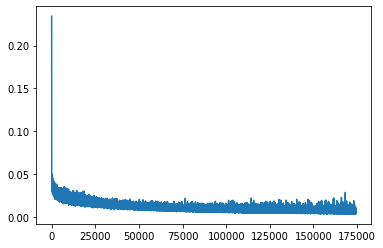

epoch: 94 	 step:0 	 loss: 0.005064
epoch: 94 	 step:100 	 loss: 0.005041
epoch: 94 	 step:200 	 loss: 0.005831
epoch: 94 	 step:300 	 loss: 0.005082
epoch: 94 	 step:400 	 loss: 0.005303
epoch: 94 	 step:500 	 loss: 0.005192
epoch: 94 	 step:600 	 loss: 0.005179
epoch: 94 	 step:700 	 loss: 0.004523
epoch: 94 	 step:800 	 loss: 0.004464
epoch: 94 	 step:900 	 loss: 0.004797
epoch: 94 	 step:1000 	 loss: 0.005233
epoch: 94 	 step:1100 	 loss: 0.00489
epoch: 94 	 step:1200 	 loss: 0.0108
epoch: 94 	 step:1300 	 loss: 0.005713
epoch: 94 	 step:1400 	 loss: 0.005451
epoch: 94 	 step:1500 	 loss: 0.004688
epoch: 94 	 step:1600 	 loss: 0.005081
epoch: 94 	 step:1700 	 loss: 0.005598
epoch: 94 	 step:1800 	 loss: 0.005648


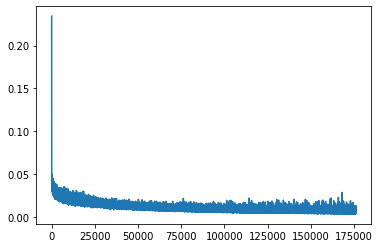

epoch: 95 	 step:0 	 loss: 0.006019
epoch: 95 	 step:100 	 loss: 0.004725
epoch: 95 	 step:200 	 loss: 0.005692
epoch: 95 	 step:300 	 loss: 0.004763
epoch: 95 	 step:400 	 loss: 0.005085
epoch: 95 	 step:500 	 loss: 0.005109
epoch: 95 	 step:600 	 loss: 0.00524
epoch: 95 	 step:700 	 loss: 0.005553
epoch: 95 	 step:800 	 loss: 0.005383
epoch: 95 	 step:900 	 loss: 0.004825
epoch: 95 	 step:1000 	 loss: 0.005818
epoch: 95 	 step:1100 	 loss: 0.00577
epoch: 95 	 step:1200 	 loss: 0.005402
epoch: 95 	 step:1300 	 loss: 0.0056
epoch: 95 	 step:1400 	 loss: 0.005662
epoch: 95 	 step:1500 	 loss: 0.005556
epoch: 95 	 step:1600 	 loss: 0.00514
epoch: 95 	 step:1700 	 loss: 0.005521
epoch: 95 	 step:1800 	 loss: 0.005095


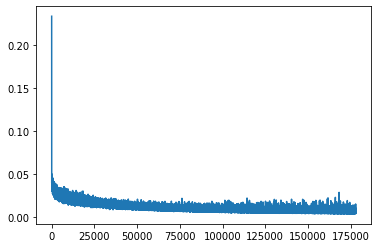

epoch: 96 	 step:0 	 loss: 0.004515
epoch: 96 	 step:100 	 loss: 0.005286
epoch: 96 	 step:200 	 loss: 0.005749
epoch: 96 	 step:300 	 loss: 0.004957
epoch: 96 	 step:400 	 loss: 0.009821
epoch: 96 	 step:500 	 loss: 0.005043
epoch: 96 	 step:600 	 loss: 0.005568
epoch: 96 	 step:700 	 loss: 0.005074
epoch: 96 	 step:800 	 loss: 0.004896
epoch: 96 	 step:900 	 loss: 0.005328
epoch: 96 	 step:1000 	 loss: 0.005371
epoch: 96 	 step:1100 	 loss: 0.005263
epoch: 96 	 step:1200 	 loss: 0.004888
epoch: 96 	 step:1300 	 loss: 0.004686
epoch: 96 	 step:1400 	 loss: 0.005557
epoch: 96 	 step:1500 	 loss: 0.005512
epoch: 96 	 step:1600 	 loss: 0.004709
epoch: 96 	 step:1700 	 loss: 0.006733
epoch: 96 	 step:1800 	 loss: 0.005313


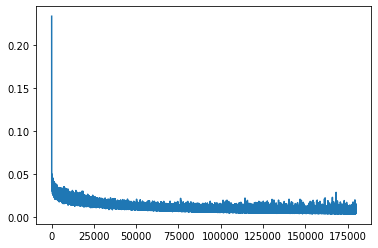

epoch: 97 	 step:0 	 loss: 0.004623
epoch: 97 	 step:100 	 loss: 0.004622
epoch: 97 	 step:200 	 loss: 0.005352
epoch: 97 	 step:300 	 loss: 0.00452
epoch: 97 	 step:400 	 loss: 0.005326
epoch: 97 	 step:500 	 loss: 0.005181
epoch: 97 	 step:600 	 loss: 0.005077
epoch: 97 	 step:700 	 loss: 0.009102
epoch: 97 	 step:800 	 loss: 0.004588
epoch: 97 	 step:900 	 loss: 0.004967
epoch: 97 	 step:1000 	 loss: 0.005031
epoch: 97 	 step:1100 	 loss: 0.005027
epoch: 97 	 step:1200 	 loss: 0.005606
epoch: 97 	 step:1300 	 loss: 0.004942
epoch: 97 	 step:1400 	 loss: 0.00574
epoch: 97 	 step:1500 	 loss: 0.005436
epoch: 97 	 step:1600 	 loss: 0.00629
epoch: 97 	 step:1700 	 loss: 0.005869
epoch: 97 	 step:1800 	 loss: 0.006451


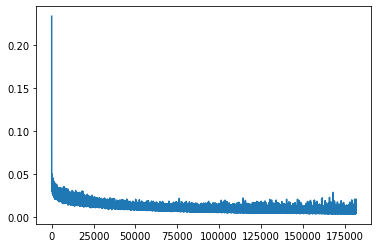

epoch: 98 	 step:0 	 loss: 0.004506
epoch: 98 	 step:100 	 loss: 0.004467
epoch: 98 	 step:200 	 loss: 0.004327
epoch: 98 	 step:300 	 loss: 0.004782
epoch: 98 	 step:400 	 loss: 0.004553
epoch: 98 	 step:500 	 loss: 0.004967
epoch: 98 	 step:600 	 loss: 0.005135
epoch: 98 	 step:700 	 loss: 0.005465
epoch: 98 	 step:800 	 loss: 0.00553
epoch: 98 	 step:900 	 loss: 0.004997
epoch: 98 	 step:1000 	 loss: 0.005952
epoch: 98 	 step:1100 	 loss: 0.004714
epoch: 98 	 step:1200 	 loss: 0.0048
epoch: 98 	 step:1300 	 loss: 0.005104
epoch: 98 	 step:1400 	 loss: 0.005312
epoch: 98 	 step:1500 	 loss: 0.005582
epoch: 98 	 step:1600 	 loss: 0.005173
epoch: 98 	 step:1700 	 loss: 0.005157
epoch: 98 	 step:1800 	 loss: 0.00507


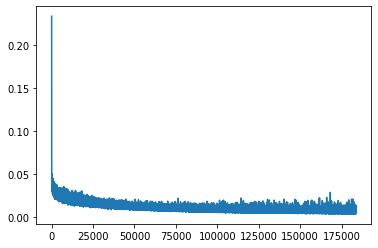

epoch: 99 	 step:0 	 loss: 0.005283
epoch: 99 	 step:100 	 loss: 0.006185
epoch: 99 	 step:200 	 loss: 0.004832
epoch: 99 	 step:300 	 loss: 0.004406
epoch: 99 	 step:400 	 loss: 0.005059
epoch: 99 	 step:500 	 loss: 0.005677
epoch: 99 	 step:600 	 loss: 0.005103
epoch: 99 	 step:700 	 loss: 0.004576
epoch: 99 	 step:800 	 loss: 0.004467
epoch: 99 	 step:900 	 loss: 0.005222
epoch: 99 	 step:1000 	 loss: 0.004773
epoch: 99 	 step:1100 	 loss: 0.005822
epoch: 99 	 step:1200 	 loss: 0.00525
epoch: 99 	 step:1300 	 loss: 0.004775
epoch: 99 	 step:1400 	 loss: 0.01117
epoch: 99 	 step:1500 	 loss: 0.005021
epoch: 99 	 step:1600 	 loss: 0.005348
epoch: 99 	 step:1700 	 loss: 0.005033
epoch: 99 	 step:1800 	 loss: 0.005539


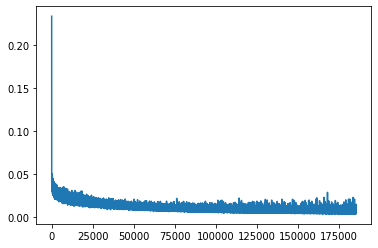

epoch: 100 	 step:0 	 loss: 0.005028
epoch: 100 	 step:100 	 loss: 0.004979
epoch: 100 	 step:200 	 loss: 0.004928
epoch: 100 	 step:300 	 loss: 0.004718
epoch: 100 	 step:400 	 loss: 0.004389
epoch: 100 	 step:500 	 loss: 0.005578
epoch: 100 	 step:600 	 loss: 0.004836
epoch: 100 	 step:700 	 loss: 0.005024
epoch: 100 	 step:800 	 loss: 0.006077
epoch: 100 	 step:900 	 loss: 0.004598
epoch: 100 	 step:1000 	 loss: 0.004696
epoch: 100 	 step:1100 	 loss: 0.00565
epoch: 100 	 step:1200 	 loss: 0.005934
epoch: 100 	 step:1300 	 loss: 0.006144
epoch: 100 	 step:1400 	 loss: 0.005347
epoch: 100 	 step:1500 	 loss: 0.004823
epoch: 100 	 step:1600 	 loss: 0.005039
epoch: 100 	 step:1700 	 loss: 0.00527
epoch: 100 	 step:1800 	 loss: 0.00443


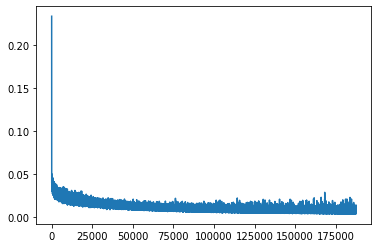

In [13]:
### TRAIN MODEL ###

num_epochs = 100

history = train_model(gen, opt, device, dataloader['train'], epochs=num_epochs)

In [14]:
def test_generator(model, device, testloader, one_batch=False):
    # put model to eval mode
    model = model.to(device=device)
    model.eval()

    # move test images to device and reduce to magnitude information in fourier space
    test_images = []
    outputs = []
    
    for data in testloader:
        data = data.to(device=device)
        test_images.append(data.cpu().numpy())
        magn = calc_mags(data)
        out = model(magn)
        
        outputs.append(out.cpu().detach().numpy())
        if one_batch: break
    
    return np.concatenate(test_images), np.concatenate(outputs)

In [15]:
# Calculate test predictions #

test_original, test_predicted = test_generator(gen, device, dataloader['test'])
print(test_original.shape)
print(test_predicted.shape)

(8000, 1, 28, 28)
(8000, 1, 28, 28)


In [16]:
### CACHE RESULTS ###

import pickle
pickle.dump(test_original, open("../cache/e2e/sgnl1-{}e_original.p".format(num_epochs), "wb"))
pickle.dump(test_predicted, open("../cache/e2e/sgnl1-{}e.p".format(num_epochs), "wb"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


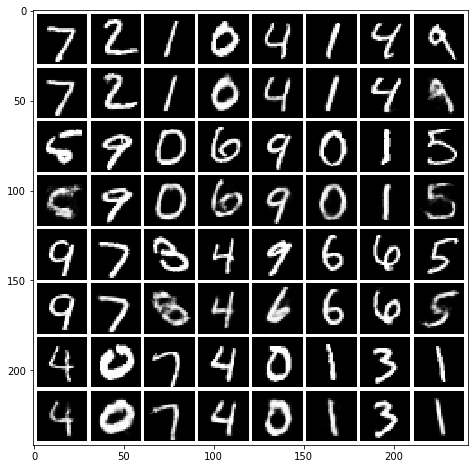

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Registered:


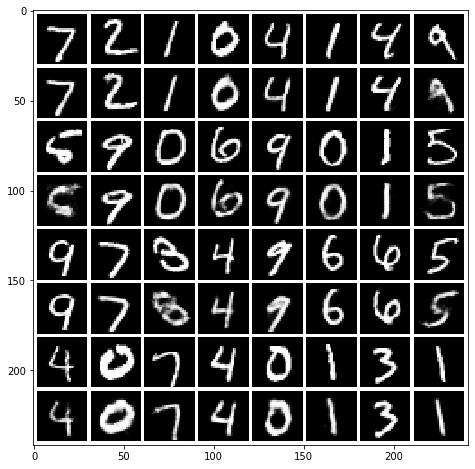

In [14]:
# Print predictions #
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    test_predicted[:32, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)
plot_grid(to_plot, figsize=(8,8), file="../out/MNIST/end-to-end/phase-prediction/e2e-l2.png")

print("Registered:")
results_reg = register_croco(test_predicted[:32], test_original[:32])
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    results_reg[:, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)        
plot_grid(to_plot, figsize=(8,8), file="../out/MNIST/end-to-end/phase-prediction/e2e-l2-reg.png")

In [15]:
# Benchmark test predictions #

benchmark(pred=test_predicted[:1024], true=test_original[:1024], check_all=True)

Signal error:
  MSE: 0.02176932534689513, std: 0.016178540719901897
  MAE: 0.04997819213258481, std: 0.02428792692450832
  SSIM: 0.7998281850258759, std: 0.13203869557698542
  Sharpness: 0.08928778213703112, std: 0.02893826796677296
  PhCo-MSE: 0.018218726909367433, std: 0.013034302644583216
  PhCo-MAE: 0.04531366919309221, std: 0.02084415411310606
  PhCo-SSIM: 0.8256065027495472, std: 0.10804066984852131
  CroCo-MSE: 0.016257659802136004, std: 0.009162125439874626
  CroCo-MAE: 0.04286448613584071, std: 0.0175188917149499
  CroCo-SSIM: 0.8394041531497317, std: 0.09042754481544278

Magnitude error:
  MSE Magnitude: 4.2887832944004165, std: 3.087935553744705

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [0.00, 1.00] - should be in [0, 1]

Markdown table values:
 0.02177 | 0.04998 | 0.7998 | 0.08929 | 0.01822 | 0.04531 | 0.8256 | 0.01626 | 0.04286 | 0.8394 | 4.289 |


## Evaluation for direct signal prediction  (1024 samples)

#### Simple L2 squared loss

| Nr | Loss | Size | epochs| MSE | MAE | SSIM | SHRP | PhaCo-MSE | PhaCo-MAE | PhaCo-SSIM | CroCo-MSE | CroCo-MAE | CroCo-SSIM | MSE Magn
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | L2 | 2048 | 100 | 0.02177 | 0.04998 | 0.7998 | 0.08929 | 0.01822 | 0.04531 | 0.8256 | 0.01626 | 0.04286 | 0.8394 | 4.289 |
| 1 | L1 | 2048 | 100 | 0.02394 | 0.04811 | 0.7978 | 0.09133 | 0.02058 | 0.04369 | 0.8201 | 0.01809 | 0.04075 | 0.8371 | 4.435 |
  
---
Signal error:
  MSE: 0.02176932534689513, std: 0.016178540719901897
  MAE: 0.04997819213258481, std: 0.02428792692450832
  SSIM: 0.7998281850258759, std: 0.13203869557698542
  Sharpness: 0.08928778213703112, std: 0.02893826796677296
  PhCo-MSE: 0.018218726909367433, std: 0.013034302644583216
  PhCo-MAE: 0.04531366919309221, std: 0.02084415411310606
  PhCo-SSIM: 0.8256065027495472, std: 0.10804066984852131
  CroCo-MSE: 0.016257659802136004, std: 0.009162125439874626
  CroCo-MAE: 0.04286448613584071, std: 0.0175188917149499
  CroCo-SSIM: 0.8394041531497317, std: 0.09042754481544278

Magnitude error:
  MSE Magnitude: 4.2887832944004165, std: 3.087935553744705

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [0.00, 1.00] - should be in [0, 1]
  
---

  MSE: 0.023944887032939732, std: 0.017202804267338456
  MAE: 0.048108867124938115, std: 0.024015614140572666
  SSIM: 0.7978477207747652, std: 0.13213819261345222
  Sharpness: 0.09132648174288532, std: 0.028074714594087384
  PhCo-MSE: 0.02057503146829731, std: 0.013910744404391048
  PhCo-MAE: 0.04368744734529173, std: 0.01989980506624523
  PhCo-SSIM: 0.820054065164492, std: 0.1112001225211728
  CroCo-MSE: 0.01809383345766946, std: 0.009757824673308357
  CroCo-MAE: 0.04075117345837498, std: 0.016246248073131474
  CroCo-SSIM: 0.8371344855926424, std: 0.08889720153281602
  

In [16]:
### Exchange original phase with FC Net computed phase ###

orig_fft = np.fft.fft2(test_original[:1024])
orig_magn = np.abs(orig_fft)
orig_phase = np.angle(orig_fft)
test_fft = np.fft.fft2(test_predicted[:1024])
test_magn = np.abs(test_fft)
test_Phase = np.angle(test_fft)

Combined = orig_magn * np.exp(1j * test_Phase)
combined = np.real(np.fft.ifft2(Combined)).astype(np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


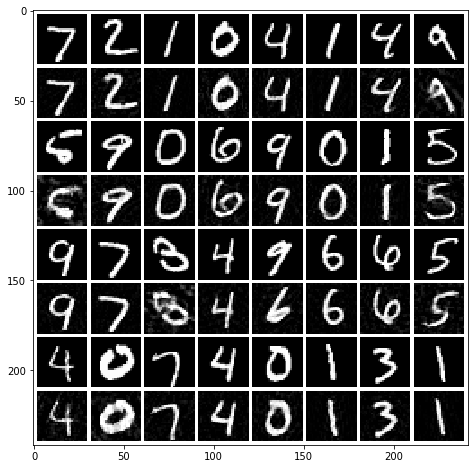

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Registered:


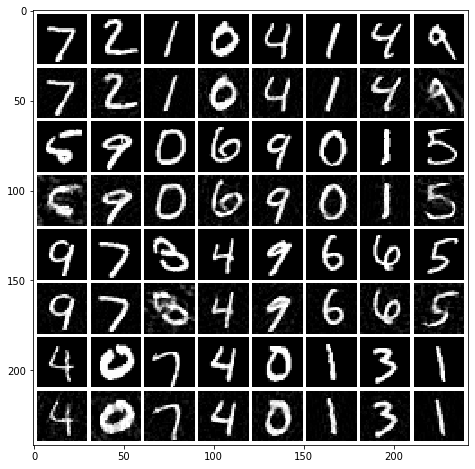

In [17]:
# Print original phase predictions #
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    combined[:32, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)
plot_grid(to_plot, figsize=(8,8), file="../out/MNIST/end-to-end/phase-prediction/e2e-magn-l2.png")

print("Registered:")
results_reg = register_croco(combined[:32], test_original[:32])
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    results_reg[:, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)        
plot_grid(to_plot, figsize=(8,8), file="../out/MNIST/end-to-end/phase-prediction/e2e-magn-l2-reg.png")

In [18]:
# Benchmark predicted phase with original magnitude #

benchmark(pred=combined, true=test_original[:1024], check_all=True)

Signal error:
  MSE: 0.023158041412102648, std: 0.020514697663245266
  MAE: 0.07948469175607897, std: 0.034861963305239475
  SSIM: 0.7218524822197667, std: 0.151969344626969
  Sharpness: 0.13909246837412836, std: 0.04419300431057977
  PhCo-MSE: 0.018379356458353868, std: 0.015753038884953614
  PhCo-MAE: 0.07360653485011426, std: 0.0309308003089458
  PhCo-SSIM: 0.7505782215280407, std: 0.1264064498971563
  CroCo-MSE: 0.015991091019031956, std: 0.010602735506368139
  CroCo-MAE: 0.07067783269121719, std: 0.027172480374546424
  CroCo-SSIM: 0.7651743926601838, std: 0.1081871430042486

Magnitude error:
  MSE Magnitude: 5.586029774736016e-06, std: 0.00017866559350681227

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [-0.54, 1.73] - should be in [0, 1]

Markdown table values:
 0.02316 | 0.07948 | 0.7219 | 0.1391 | 0.01838 | 0.07361 | 0.7506 | 0.01599 | 0.07068 | 0.7652 | 0.000005586 |


## Evaluation for signal prediction with original magnitude  (1024 samples)

#### Simple L2 squared loss

| Nr | Loss | Size | epochs| MSE | MAE | SSIM | SHRP | PhaCo-MSE | PhaCo-MAE | PhaCo-SSIM | CroCo-MSE | CroCo-MAE | CroCo-SSIM | MSE Magn
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | L2 | 2048 | 100 | 0.02316 | 0.07948 | 0.7219 | 0.1391 | 0.01838 | 0.07361 | 0.7506 | 0.01599 | 0.07068 | 0.7652 | 0.000005586 |
| 1 | L1 | 2048 | 100 | 0.02348 | 0.08005 | 0.7136 | 0.1392 | 0.01929 | 0.07479 | 0.7377 | 0.01643 | 0.07139 | 0.7561 | 0.0001351 |

---

Signal error:
  MSE: 0.023158041412102648, std: 0.020514697663245266
  MAE: 0.07948469175607897, std: 0.034861963305239475
  SSIM: 0.7218524822197667, std: 0.151969344626969
  Sharpness: 0.13909246837412836, std: 0.04419300431057977
  PhCo-MSE: 0.018379356458353868, std: 0.015753038884953614
  PhCo-MAE: 0.07360653485011426, std: 0.0309308003089458
  PhCo-SSIM: 0.7505782215280407, std: 0.1264064498971563
  CroCo-MSE: 0.015991091019031956, std: 0.010602735506368139
  CroCo-MAE: 0.07067783269121719, std: 0.027172480374546424
  CroCo-SSIM: 0.7651743926601838, std: 0.1081871430042486

Magnitude error:
  MSE Magnitude: 5.586029774736016e-06, std: 0.00017866559350681227

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [-0.54, 1.73] - should be in [0, 1]

---

Signal error:
  MSE: 0.02347619256102007, std: 0.020596185826155404
  MAE: 0.0800518188989372, std: 0.0343884990936933
  SSIM: 0.7135884081192166, std: 0.15009666783197703
  Sharpness: 0.13924089822989527, std: 0.04239194338844407
  PhCo-MSE: 0.019286821675677857, std: 0.016025632967739137
  PhCo-MAE: 0.07479148173842987, std: 0.03046920567735696
  PhCo-SSIM: 0.7377469240059958, std: 0.13149503039601726
  CroCo-MSE: 0.016433796542514756, std: 0.010836780853887564
  CroCo-MAE: 0.07139337022636028, std: 0.026578345989260843
  CroCo-SSIM: 0.7561313096719708, std: 0.10710327794606697
